### Import & Data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from tqdm import tqdm
import os
import seaborn as sns
import re

_dir = '_21'
_month = '02'
_file_ls = [i for i in os.listdir(_dir) if re.split('/|_',_dir)[-1]+_month in re.split('_', i)]
freez2005 = pd.read_csv(os.path.join(_dir, [i for i in _file_ls if 'freezer' in i][0]))
suth2005 = pd.read_csv(os.path.join(_dir, [i for i in _file_ls if 'suth' in i][0]))

freez2005.columns
freez2005.columns = ['freezer_id', 'gw_time', 'status', 'fan_run', 'fan_trip',
       'freez_run', 'freez_trip', 'defrost', 'ctrl_mode', 'ctrl_operation',
       'operation', 'run_time', 'insert_dt']

suth2005.columns
suth2005.columns = ['sensor_id', 'gw_time', 'status', 'color_list', 'avg_temperature',
       'avg_humidity', 'temperature', 'humidity', 'battery', 'available',
       'insert_dt']

%matplotlib inline

### 19 sensor, freezer 추출, Column 선별, Type 재설정

In [2]:
# No. 16
sensor_id = [329, 332, 335]
freezer_id = [344, 362, 368]

df_sensor = pd.DataFrame()
df_freezer = pd.DataFrame()

for elem in sensor_id:
    df_sensor = pd.concat([df_sensor, suth2005[suth2005['sensor_id'] == elem]])
    print("sensor id {}의 데이터 개수: {}".format(elem, len(suth2005[suth2005['sensor_id'] == elem])))
for elem in freezer_id:
    df_freezer = pd.concat([df_freezer, freez2005[freez2005['freezer_id'] == elem]])
    print("freezer id {}의 데이터 개수: {}".format(elem, len(df_freezer[df_freezer['freezer_id'] == elem])))

df_sensor.sort_values(by = ['sensor_id', 'gw_time'])
df_freezer.sort_values(by = ['freezer_id', 'gw_time'])

print('sensor: ',df_sensor['sensor_id'].unique())
print('freezer: ', df_freezer['freezer_id'].unique())

df_sensor = df_sensor.drop(columns = ['color_list','insert_dt'])
df_freezer = df_freezer.drop(columns= ['insert_dt'])

df_sensor['gw_time'] = pd.to_datetime(df_sensor['gw_time'])
df_freezer['gw_time'] = pd.to_datetime(df_freezer['gw_time'])


sensor id 329의 데이터 개수: 80129
sensor id 332의 데이터 개수: 80129
sensor id 335의 데이터 개수: 80129
freezer id 344의 데이터 개수: 82991
freezer id 362의 데이터 개수: 82991
freezer id 368의 데이터 개수: 82991
sensor:  [329 332 335]
freezer:  [344 362 368]


# Sensor 결측치 처리
- sensor의 available == 0 일 때, 결측치 발생
- 결측치는 모두 -99999로 되어있음

In [3]:
df_sensor.isnull().sum()

sensor_id          0
gw_time            0
status             0
avg_temperature    0
avg_humidity       0
temperature        0
humidity           0
battery            0
available          0
dtype: int64

In [4]:
condition = df_sensor.values == -99999
df_sensor[condition] = np.nan

# Freezer

## status

- 모든 status가 1

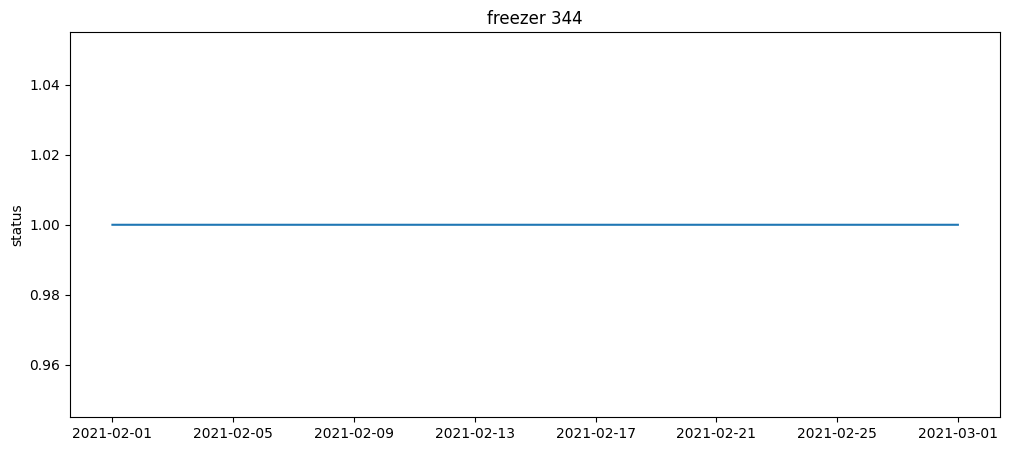

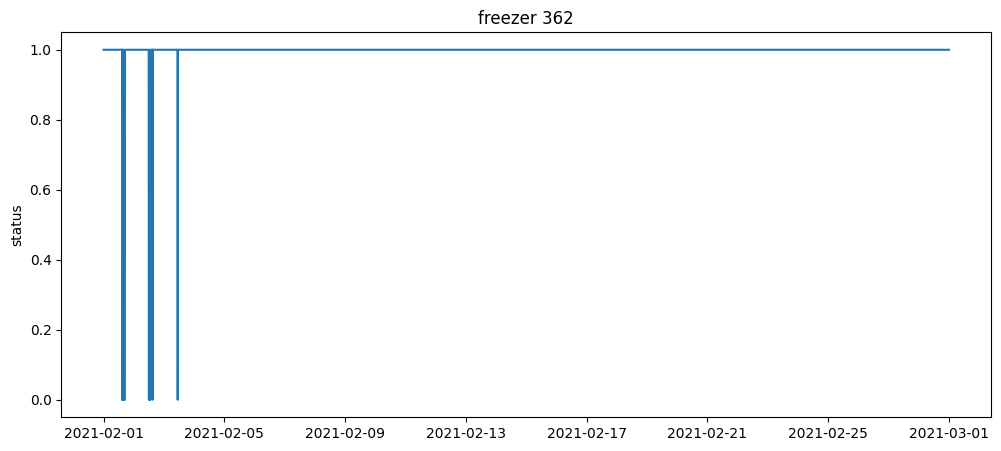

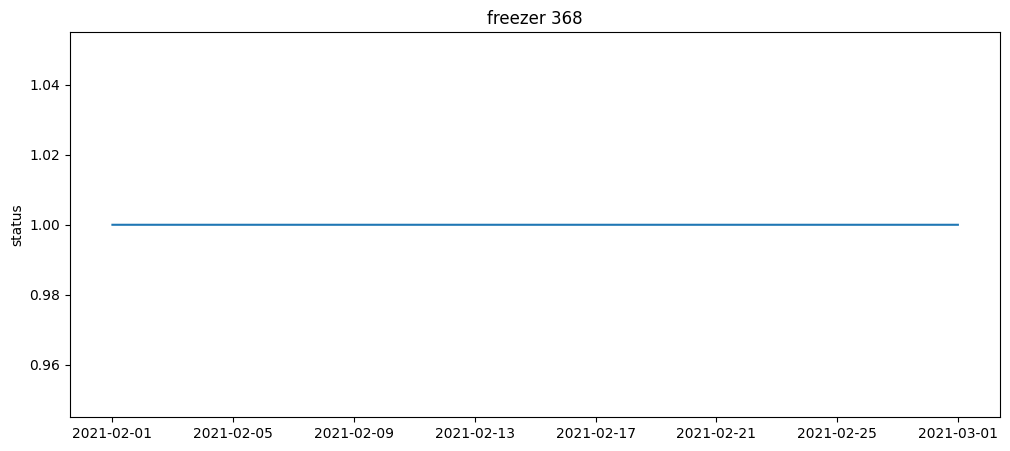

In [5]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('status')
    plt.plot(df_tmp['gw_time'], df_tmp['status'])
    

## fan_run

- 19년도 데이터와는 다른 불규칙적인 패턴

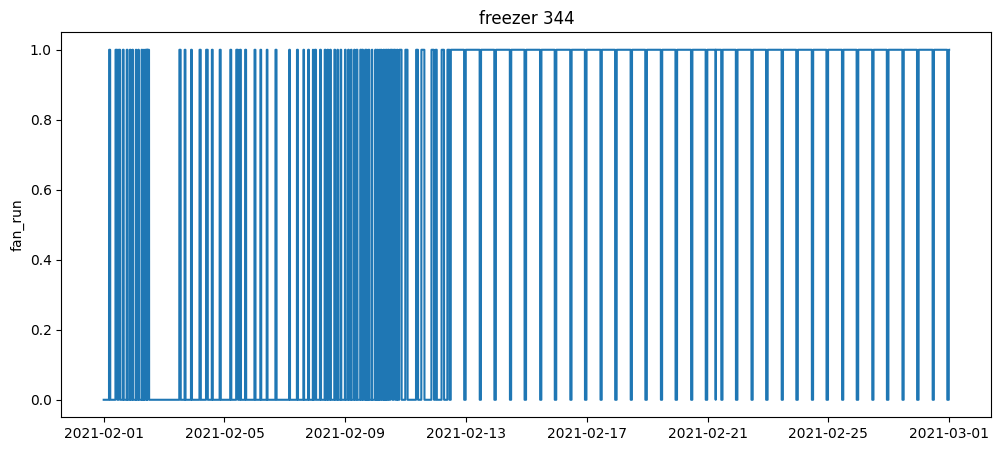

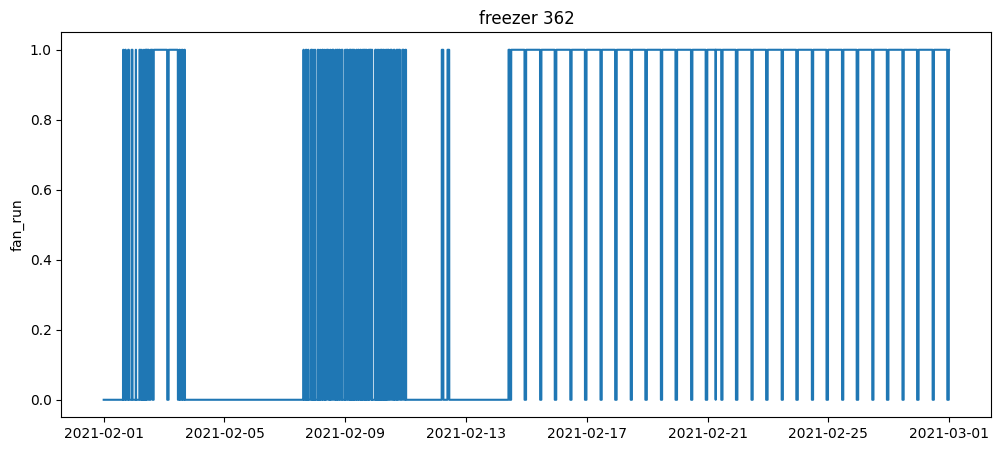

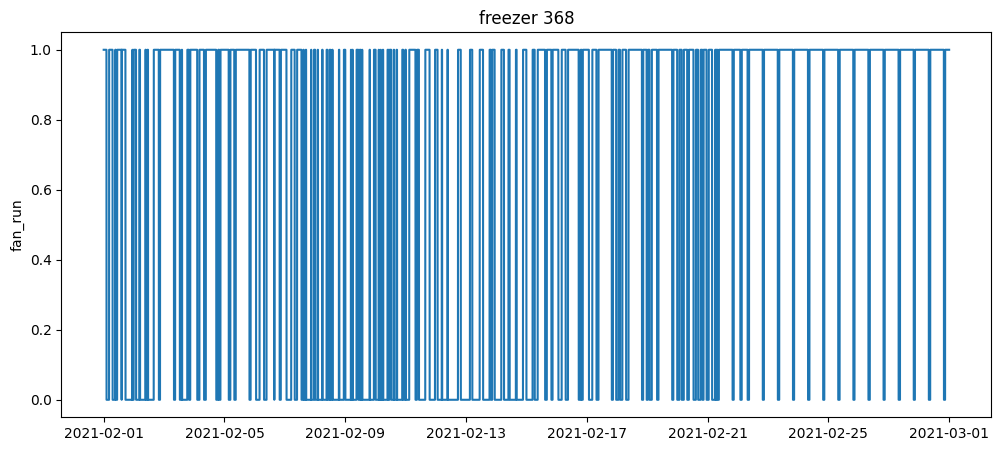

In [6]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('fan_run')
    plt.plot(df_tmp['gw_time'], df_tmp['fan_run'])

## fan_trip

- 모든 trip(차단)이 0

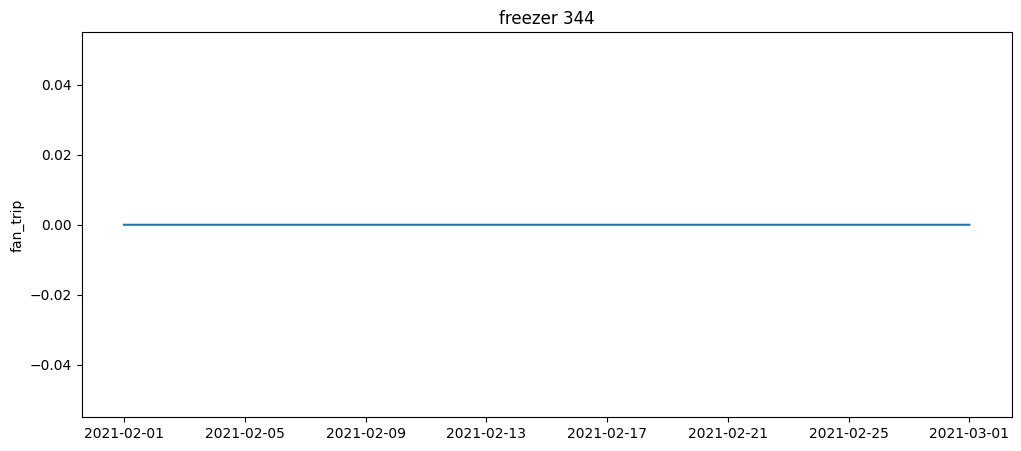

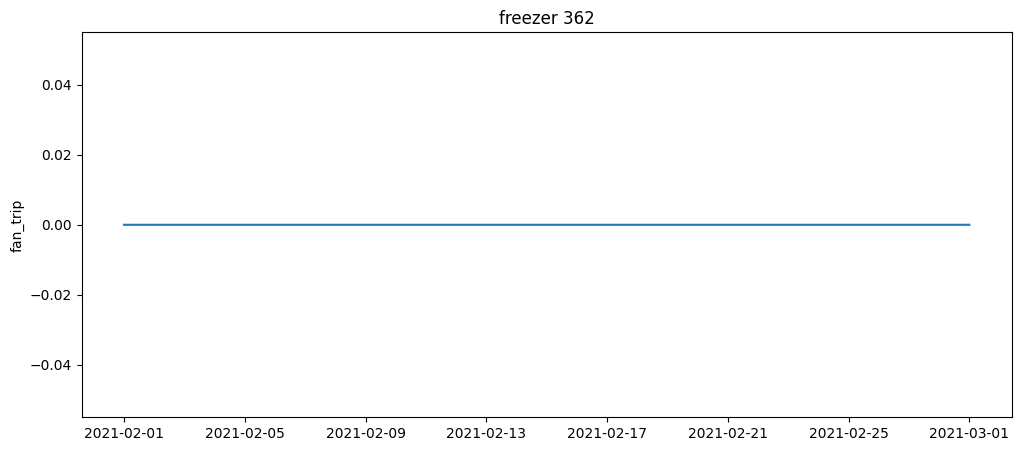

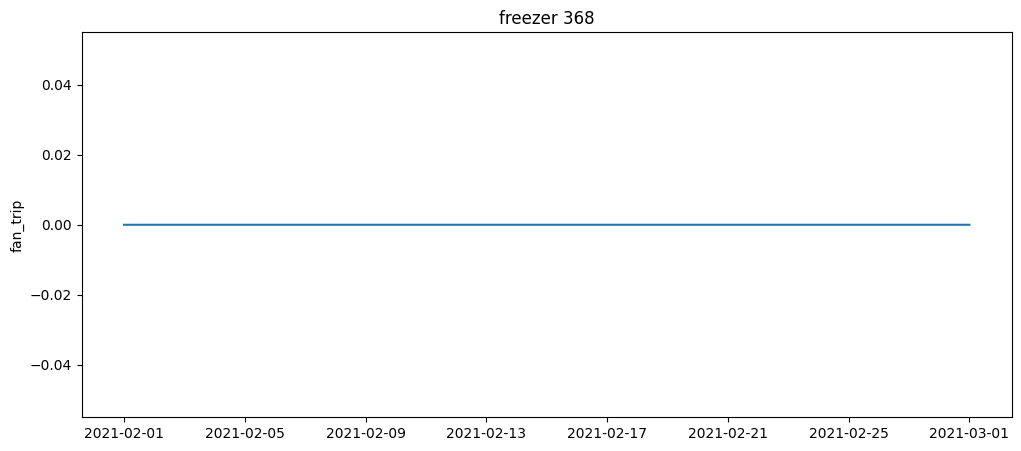

In [7]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('fan_trip')
    plt.plot(df_tmp['gw_time'], df_tmp['fan_trip'])

## freez_run

- fan과 마찬가지로 불규칙적인 패턴

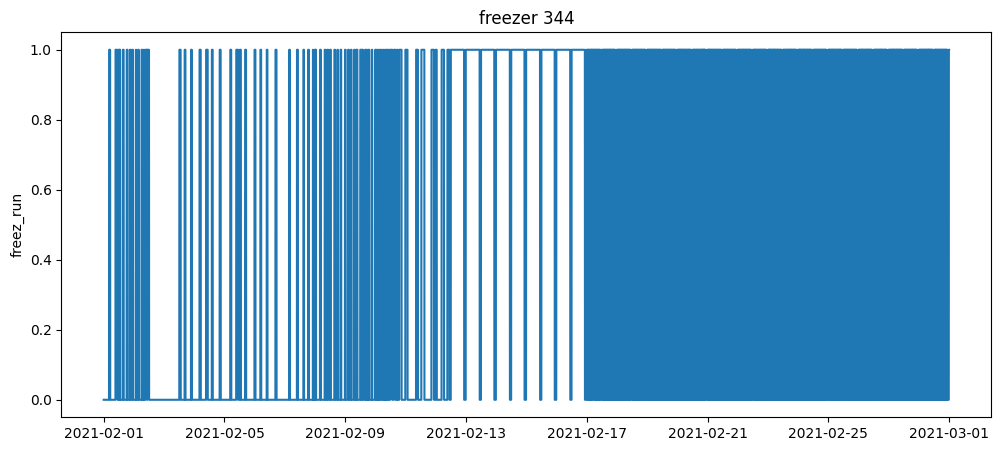

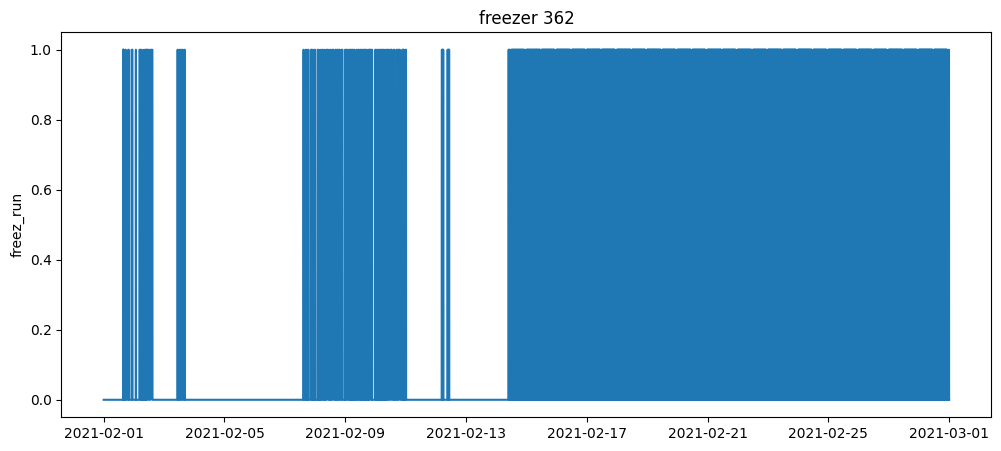

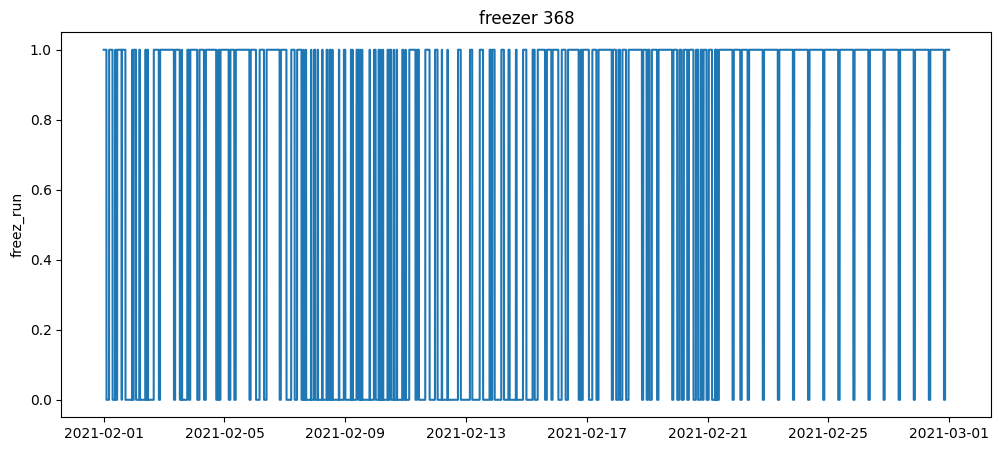

In [8]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('freez_run')
    plt.plot(df_tmp['gw_time'], df_tmp['freez_run'])

## freez_trip

- fan과 마찬가지로 전구간 값이 0

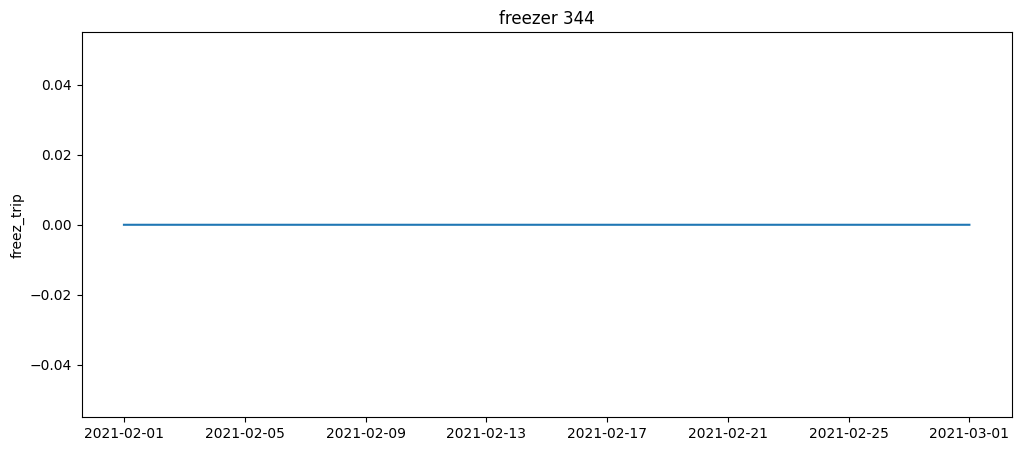

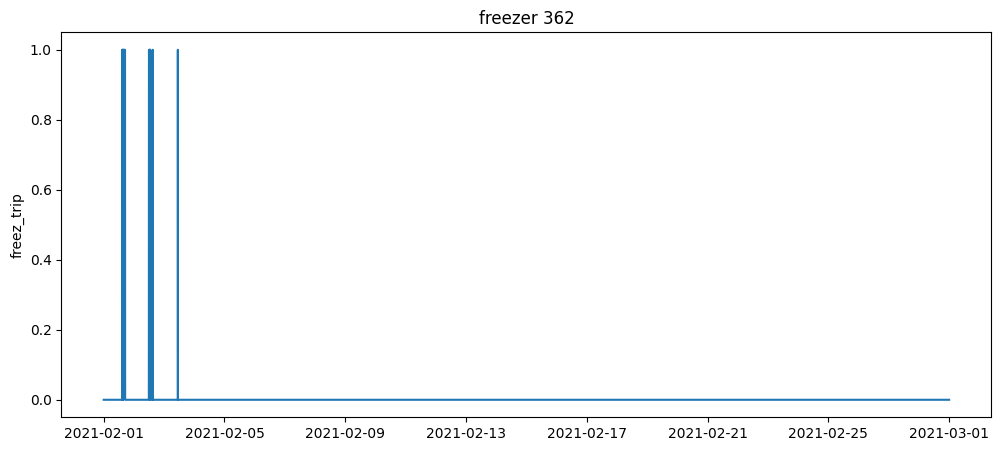

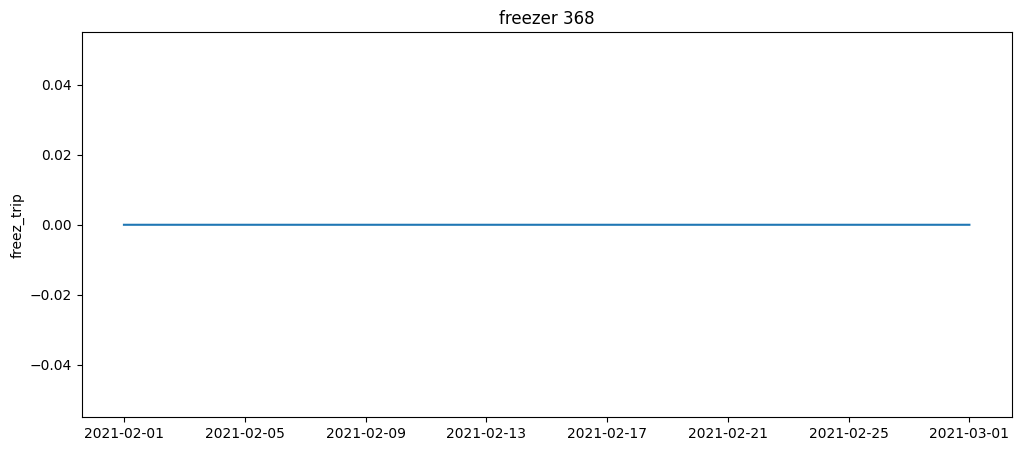

In [9]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('freez_trip')
    plt.plot(df_tmp['gw_time'], df_tmp['freez_trip'])

## defrost

- 19년도 데이터와 다르게 fan_run과 inverse한 값이 나타나지 않고 불규칙적

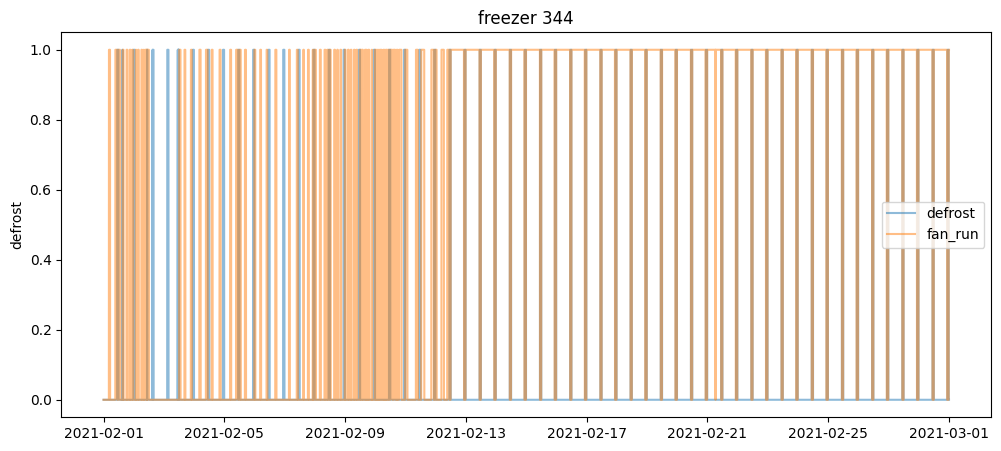

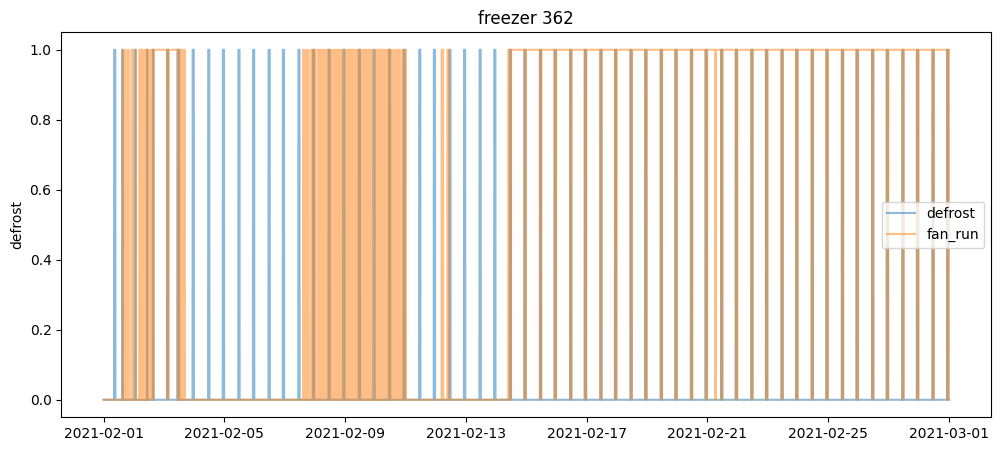

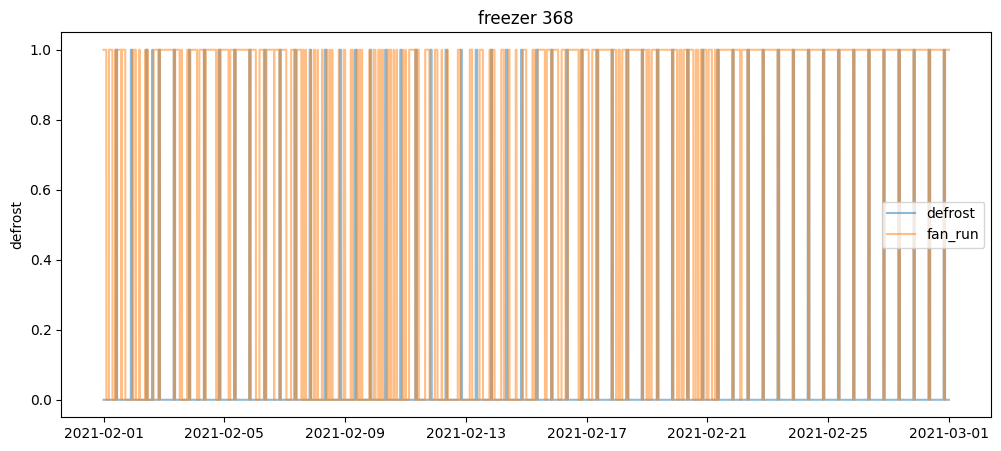

In [10]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('defrost')
    plt.plot(df_tmp['gw_time'], df_tmp['defrost'], alpha = 0.5, label = 'defrost')
    plt.plot(df_tmp['gw_time'], df_tmp['fan_run'], alpha = 0.5, label = 'fan_run')
    plt.legend()

## ctrl_mode

- 전구간 운영모드는 1(자동)

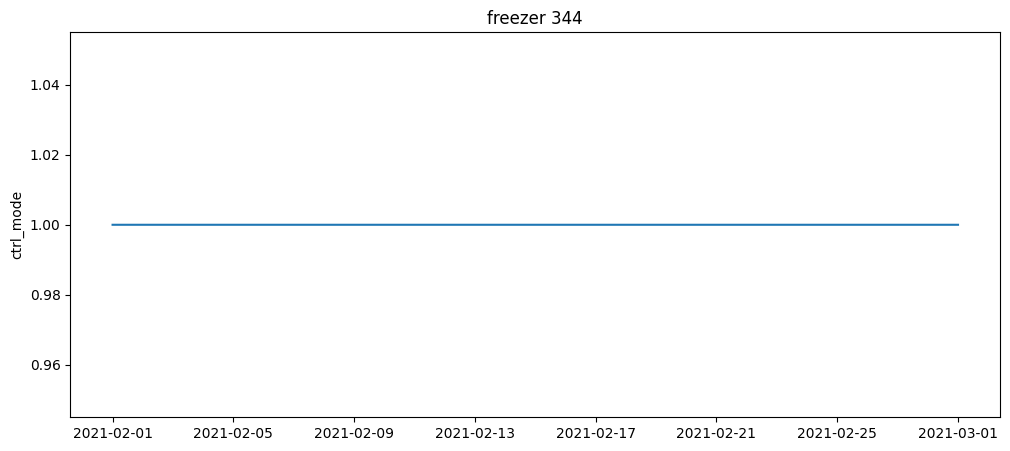

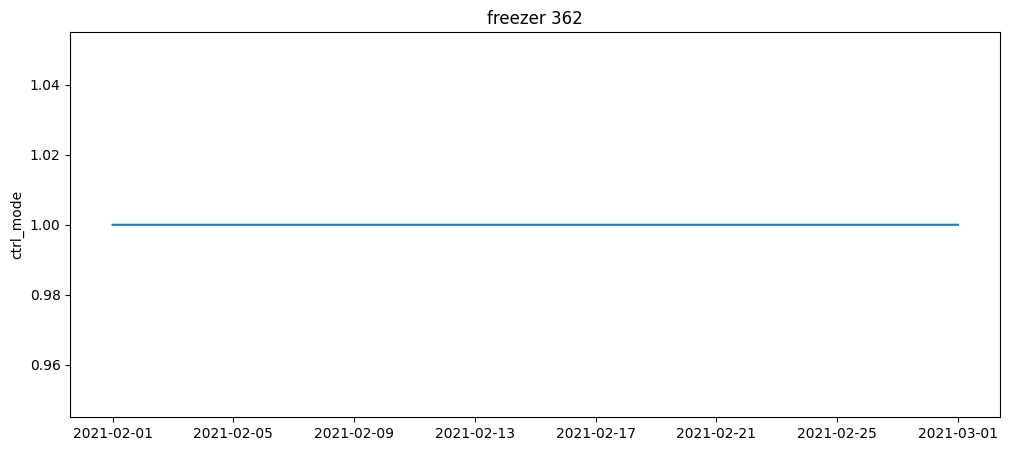

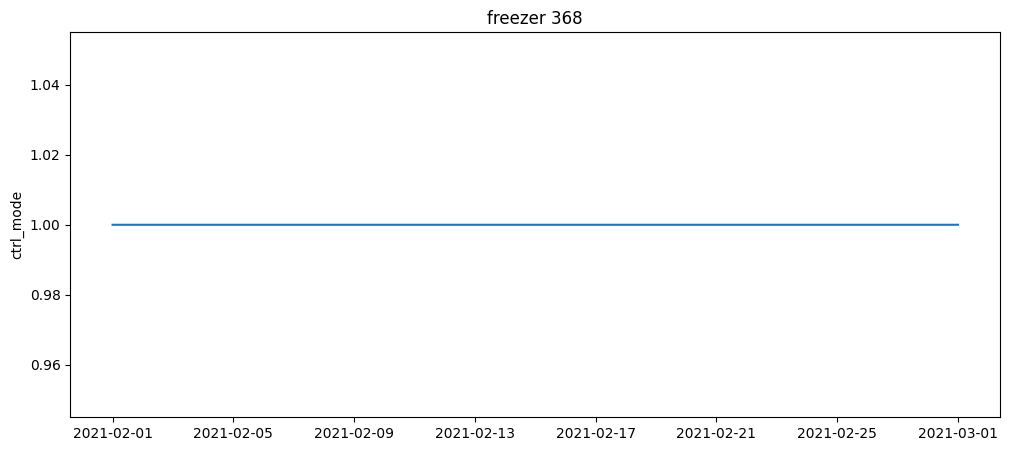

In [11]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('ctrl_mode')
    plt.plot(df_tmp['gw_time'], df_tmp['ctrl_mode'])

## ctrl_operation

- 전구간 operation과 같은 변화를 보이며, 제어 요청상태가 불규칙적으로 변함

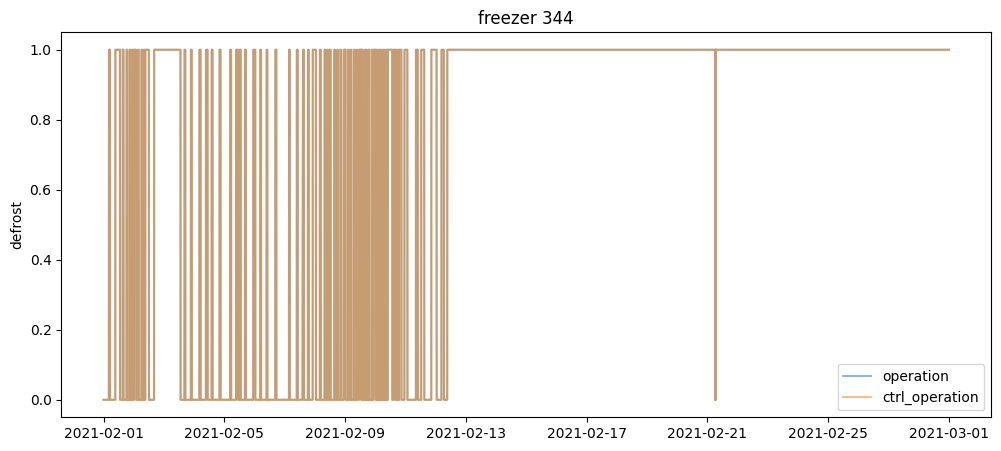

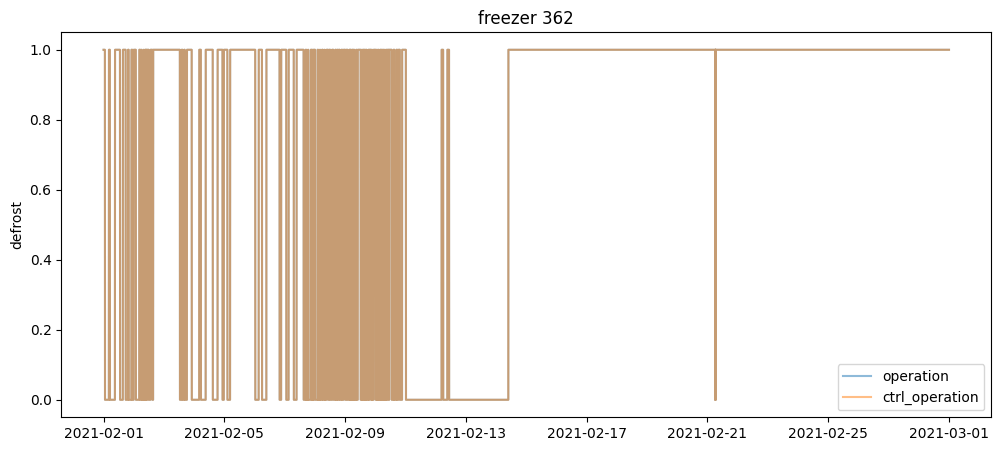

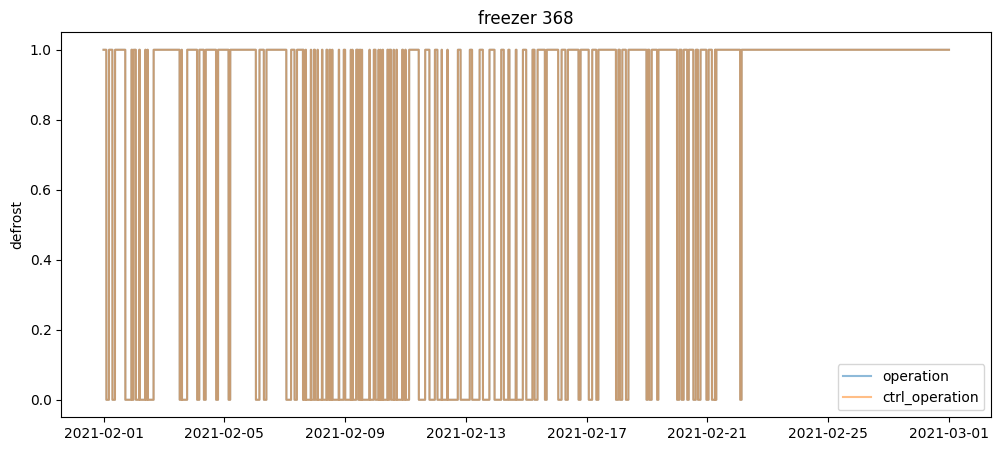

In [12]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('defrost')
    plt.plot(df_tmp['gw_time'], df_tmp['operation'], alpha = 0.5, label = 'operation')
    plt.plot(df_tmp['gw_time'], df_tmp['ctrl_operation'], alpha = 0.5, label = 'ctrl_operation')
    plt.legend()

## operation


- sv 실제 가동상태로 불규칙적 변화

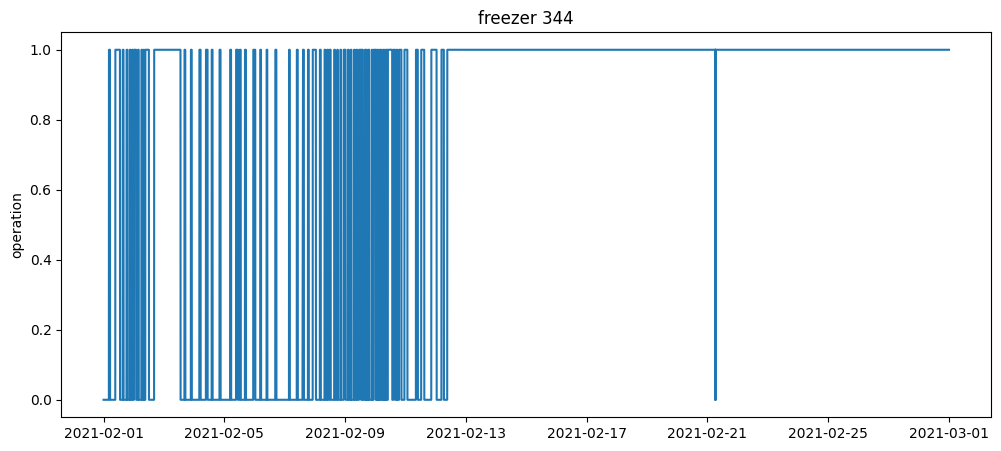

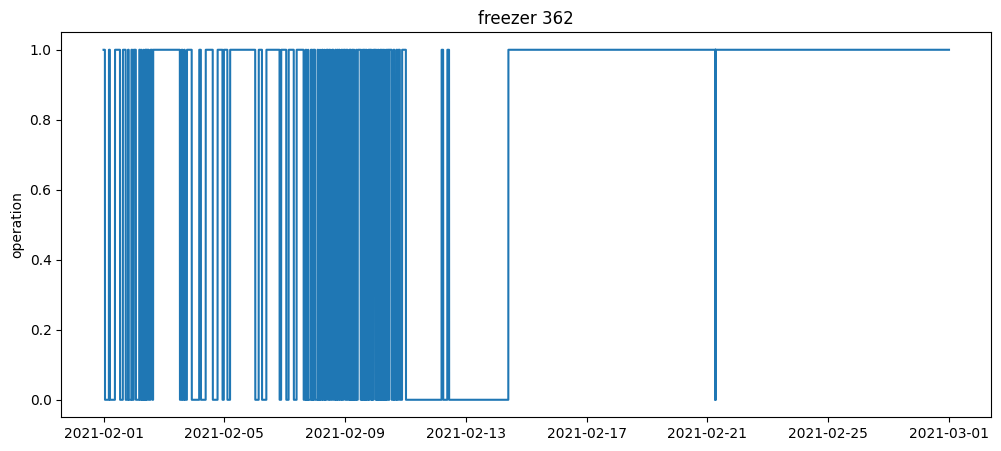

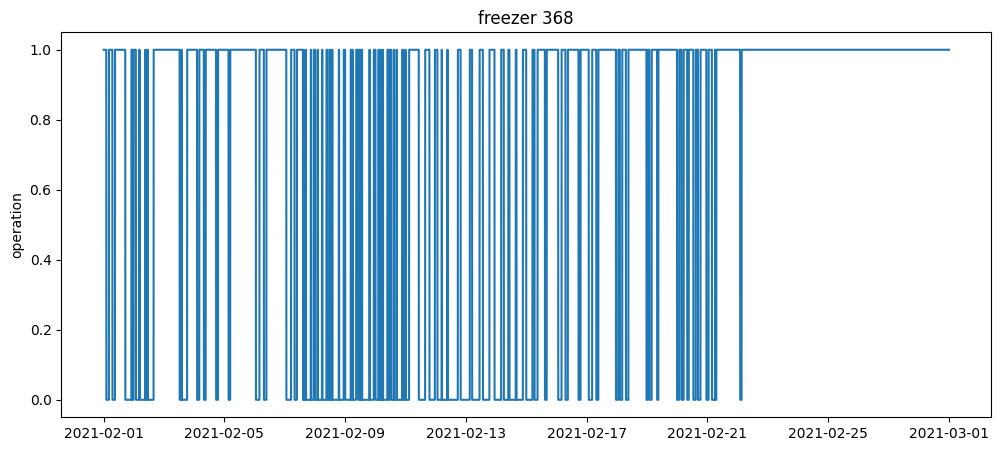

In [13]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('operation')
    plt.plot(df_tmp['gw_time'], df_tmp['operation'])

## run_time

- 19년도 데이터와는 다르게 일별 가동시간 줄어듦, 불연속적 가동 (run_time이 비선형적으로 증가하는 모습)

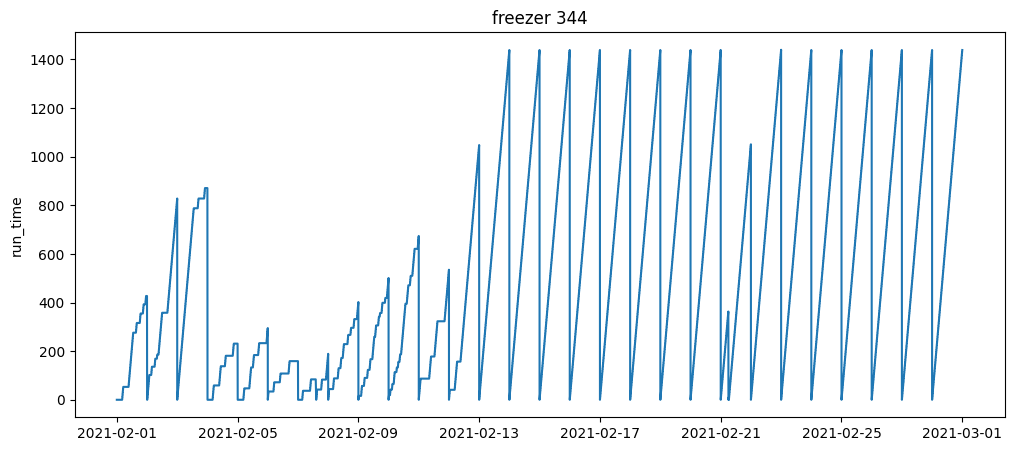

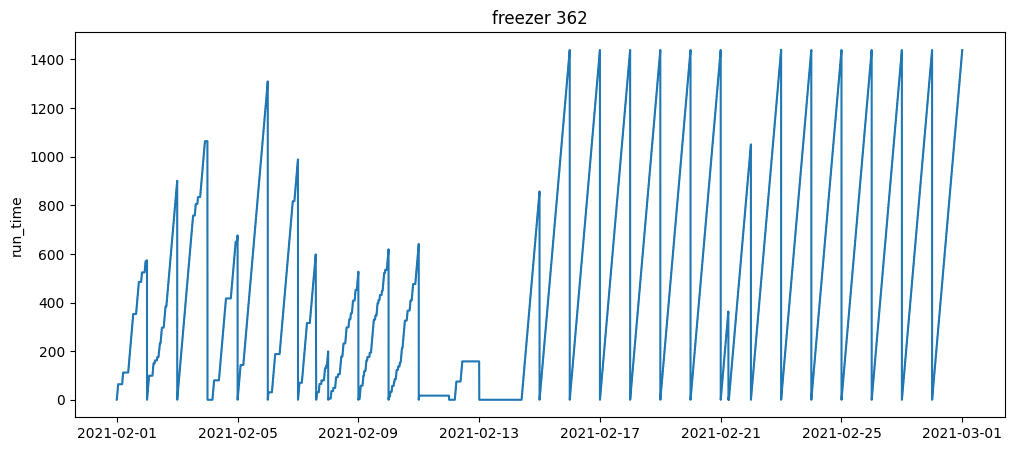

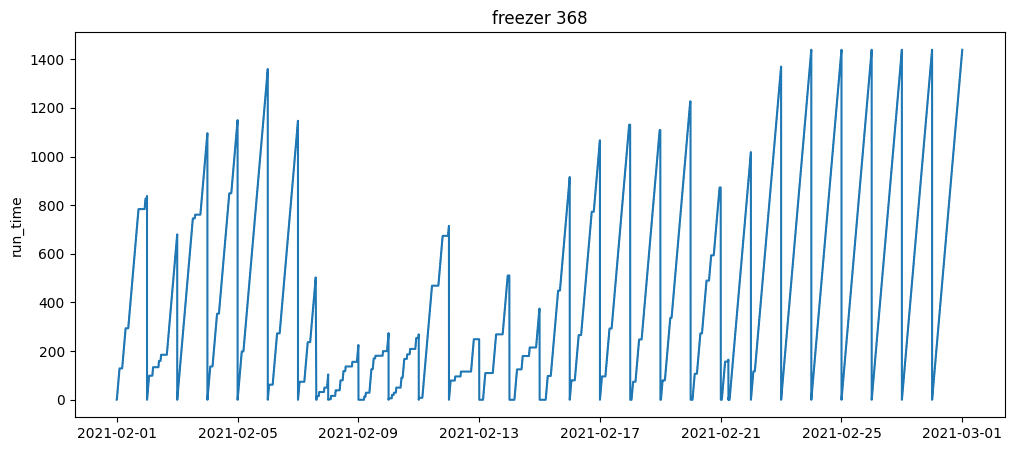

In [14]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('run_time')
    plt.plot(df_tmp['gw_time'], df_tmp['run_time'])

## 변수 묶어서 보기
- operation이 0이면 run time은 증가하지 않음

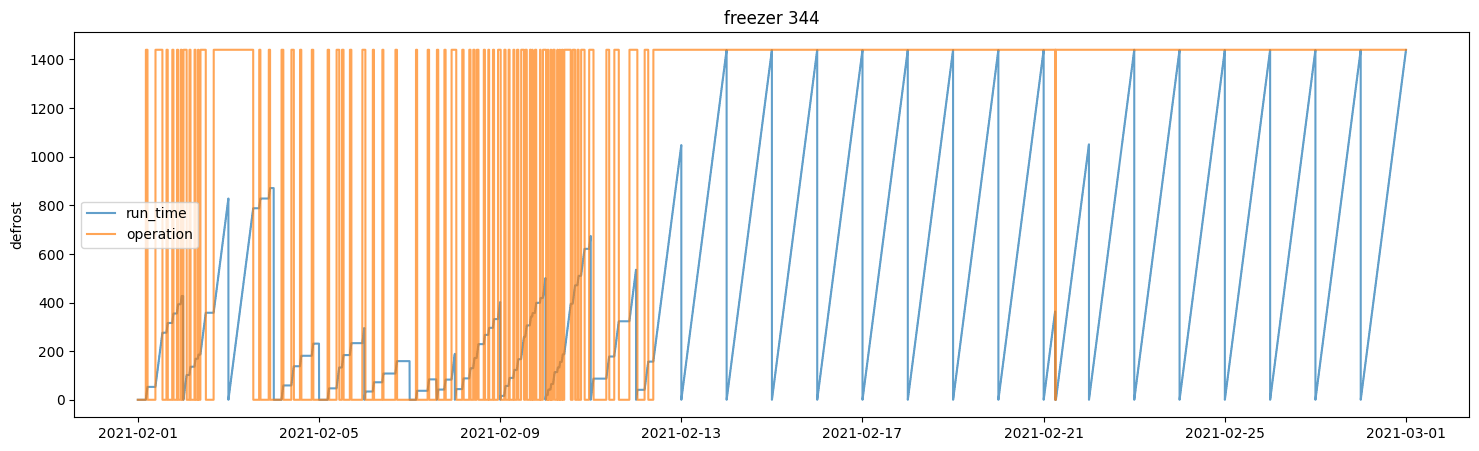

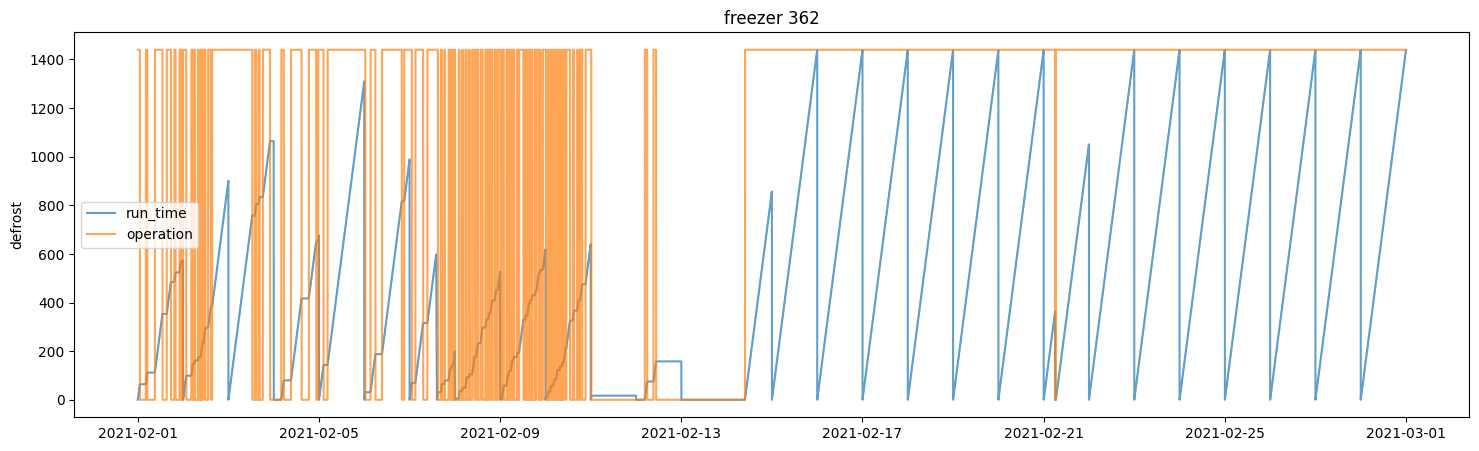

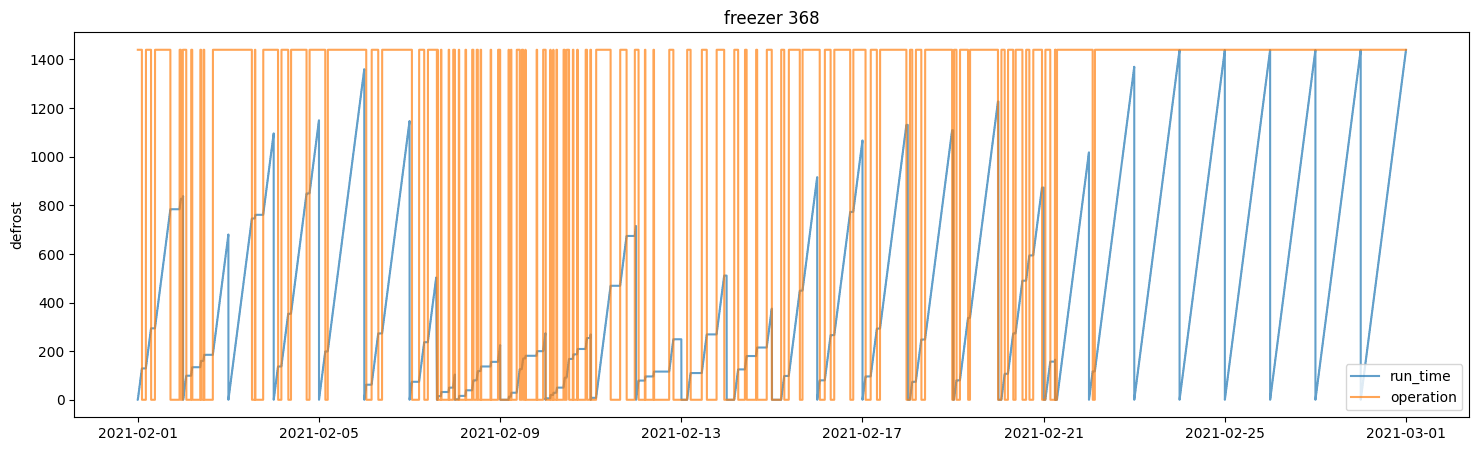

In [15]:
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    plt.figure(figsize= (18,5))
    plt.title('freezer {}'.format(_id))
    plt.ylabel('defrost')
    plt.plot(df_tmp['gw_time'], df_tmp['run_time'], alpha = 0.7, label = 'run_time')
    # plt.plot(df_tmp['gw_time'], df_tmp['operation']*1440, alpha = 0.7, label = 'ctrl_operation')
    # plt.plot(df_tmp['gw_time'], df_tmp['operation']*1440, alpha = 0.7, label = 'ctrl_mode')
    plt.plot(df_tmp['gw_time'], df_tmp['operation']*1440, alpha = 0.7, label = 'operation')
    plt.legend()

# Sensor

## status

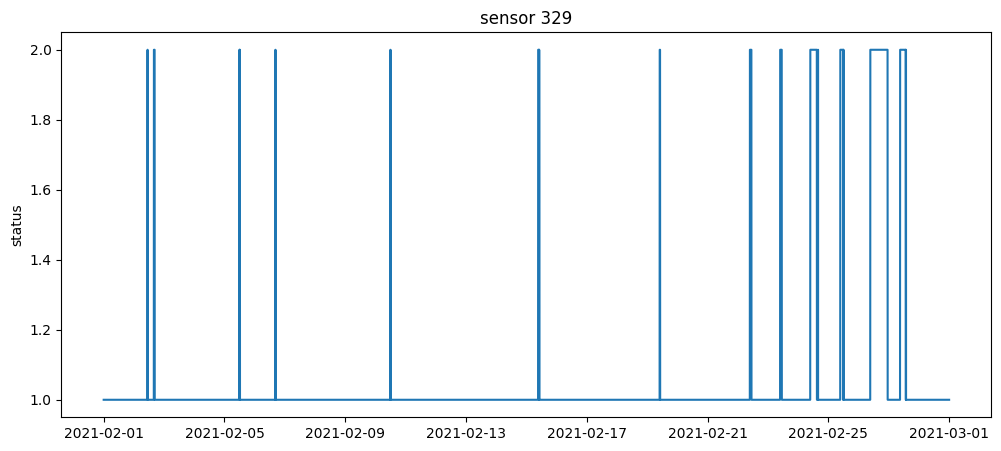

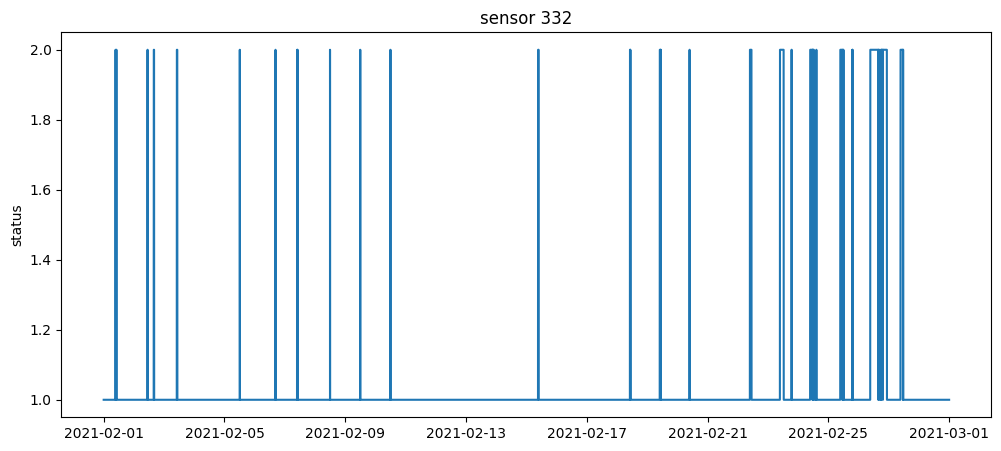

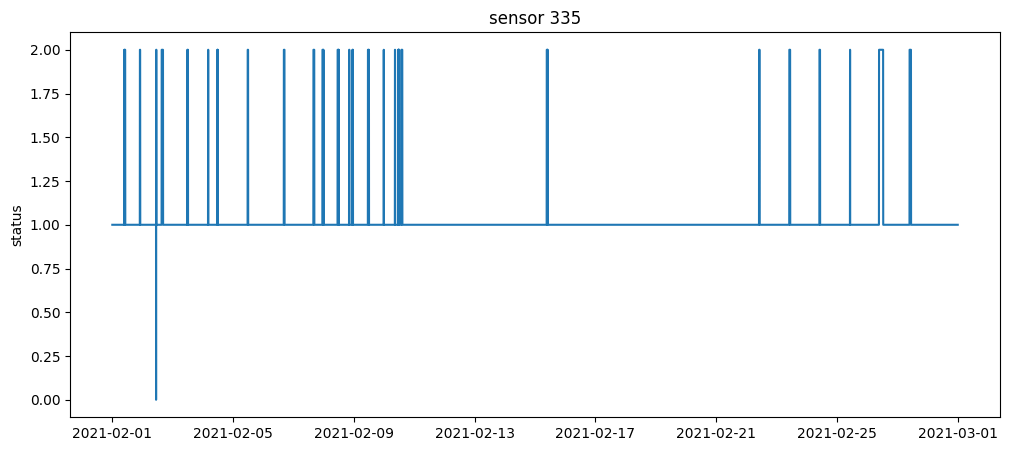

In [16]:
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('sensor {}'.format(_id))
    plt.ylabel('status')
    plt.plot(df_tmp['gw_time'], df_tmp['status'])

## avg_temperature & temperature

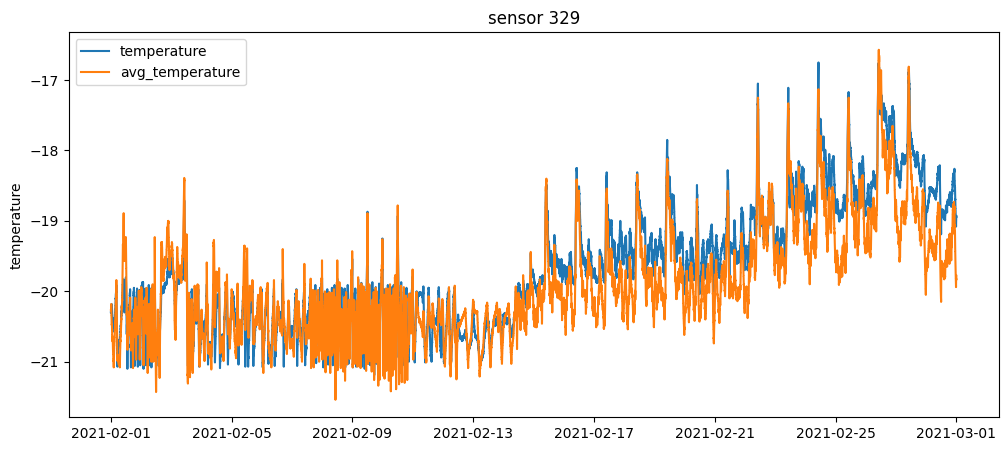

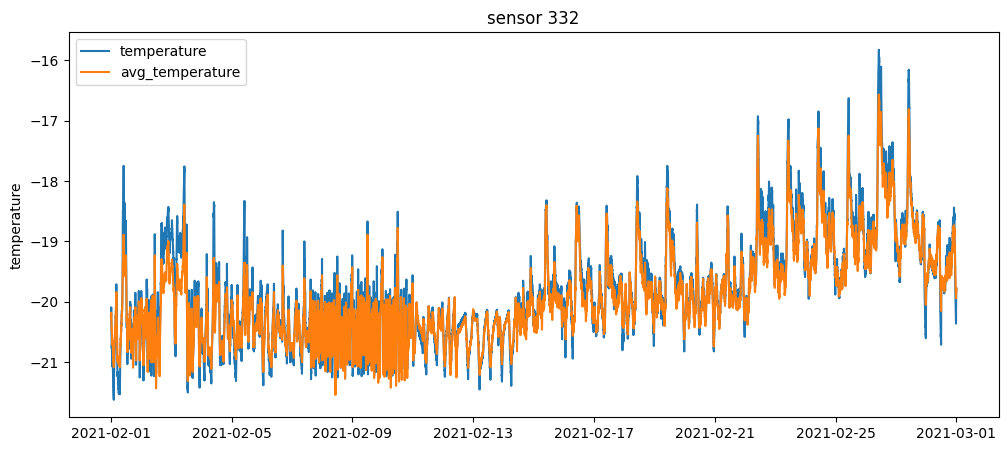

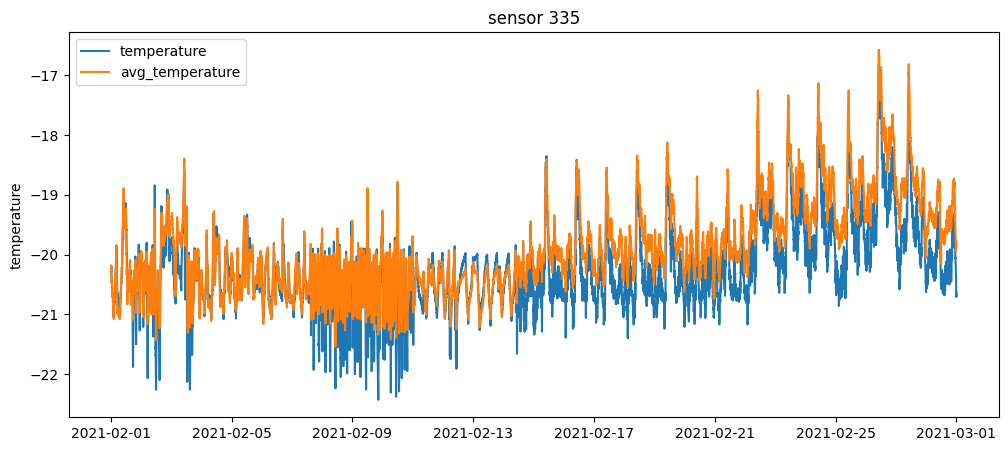

In [17]:
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('sensor {}'.format(_id))
    plt.ylabel('temperature')
    plt.plot(df_tmp['gw_time'], df_tmp['temperature'], label = 'temperature')
    plt.plot(df_tmp['gw_time'], df_tmp['avg_temperature'], label = 'avg_temperature')
    plt.legend()

## avg_humidity & humidity

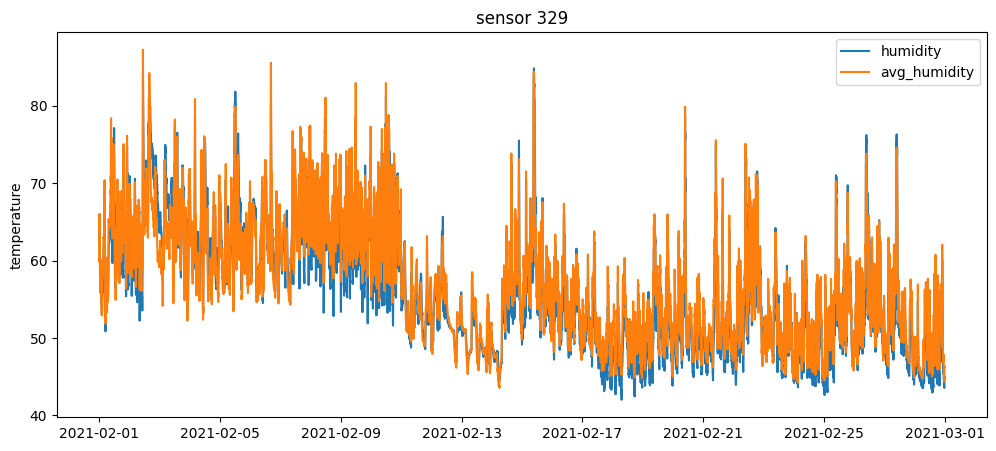

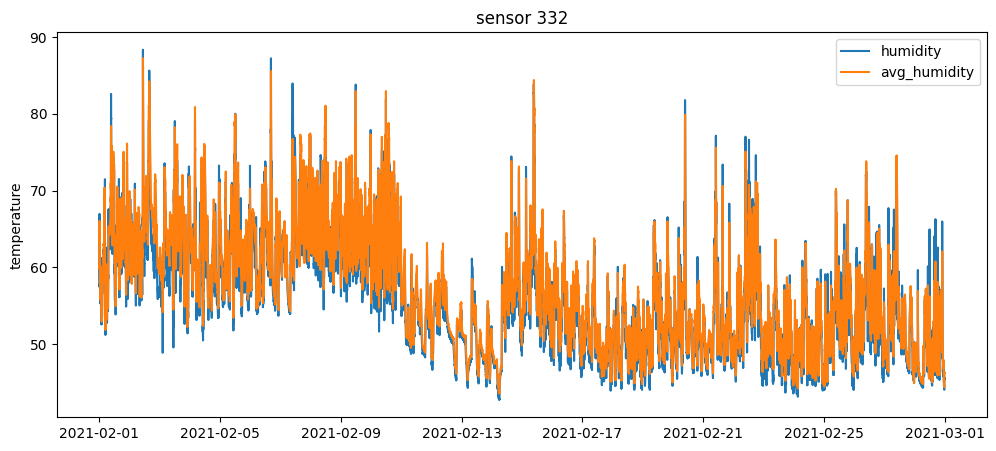

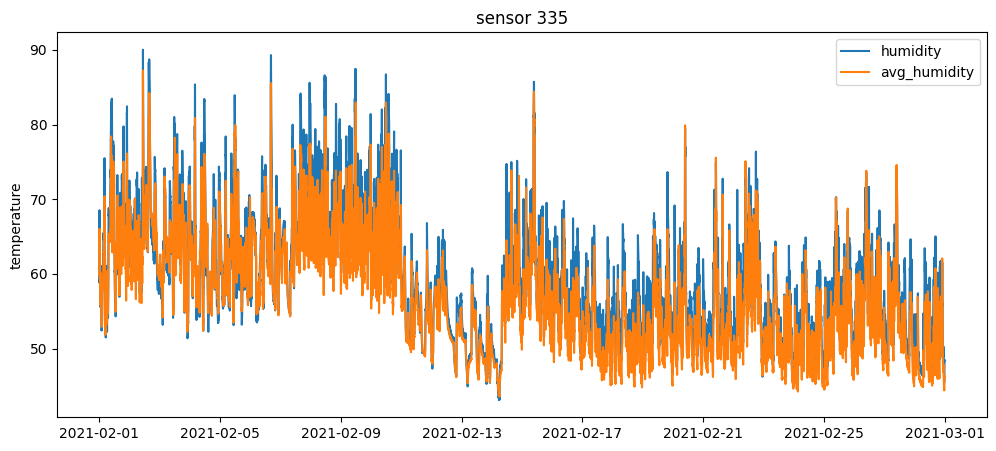

In [18]:
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('sensor {}'.format(_id))
    plt.ylabel('temperature')
    plt.plot(df_tmp['gw_time'], df_tmp['humidity'], label = 'humidity')
    plt.plot(df_tmp['gw_time'], df_tmp['avg_humidity'], label = 'avg_humidity')
    plt.legend()

## battery

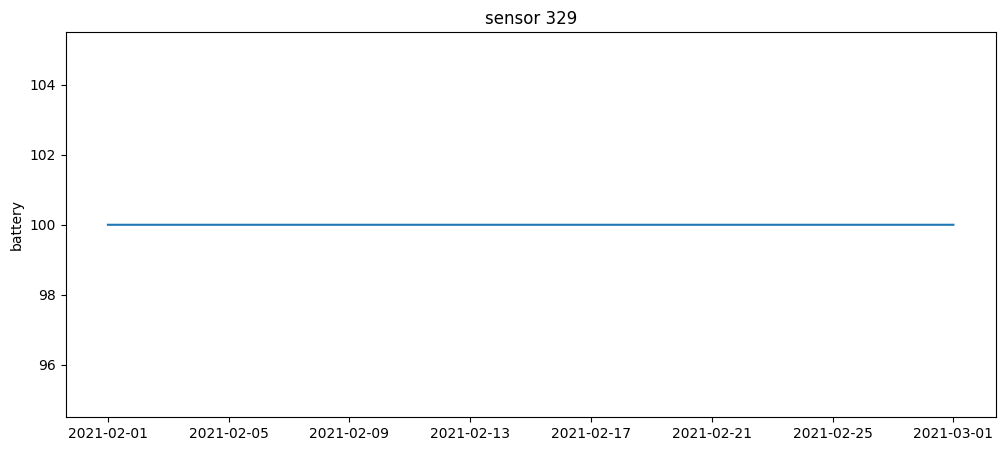

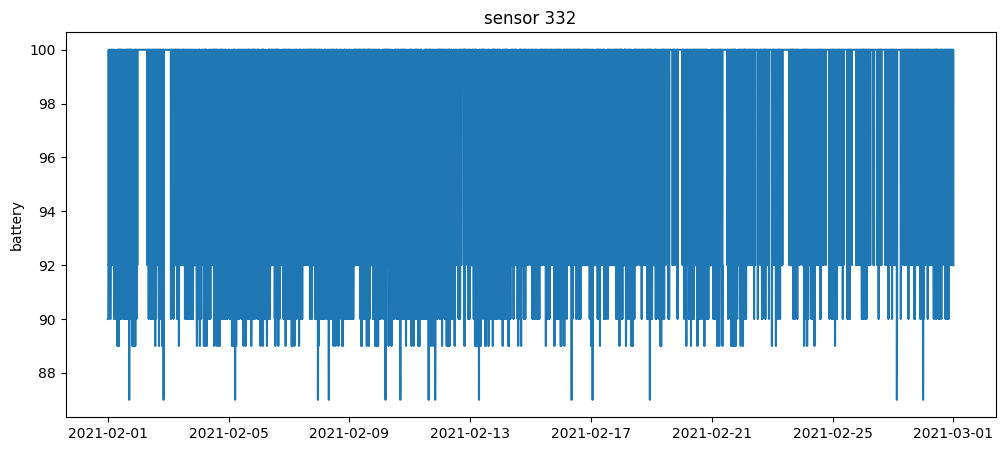

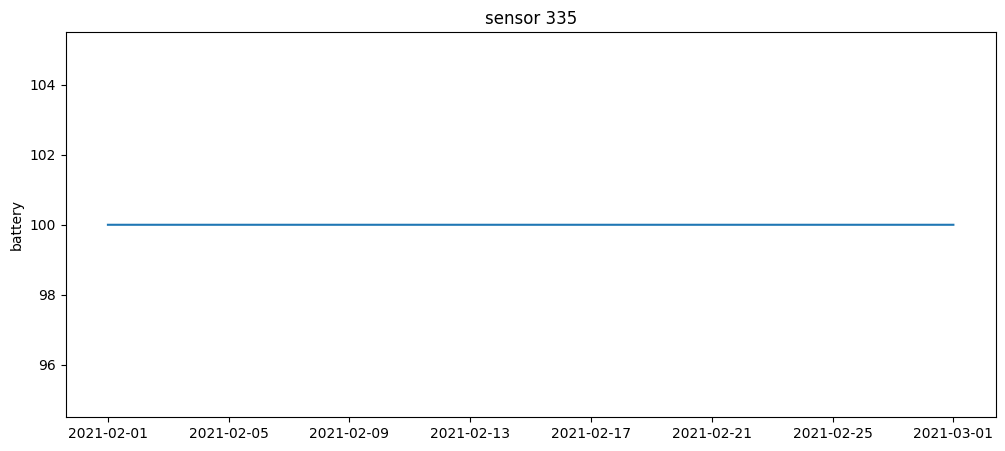

In [19]:
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('sensor {}'.format(_id))
    plt.ylabel('battery')
    plt.plot(df_tmp['gw_time'], df_tmp['battery'])

## available

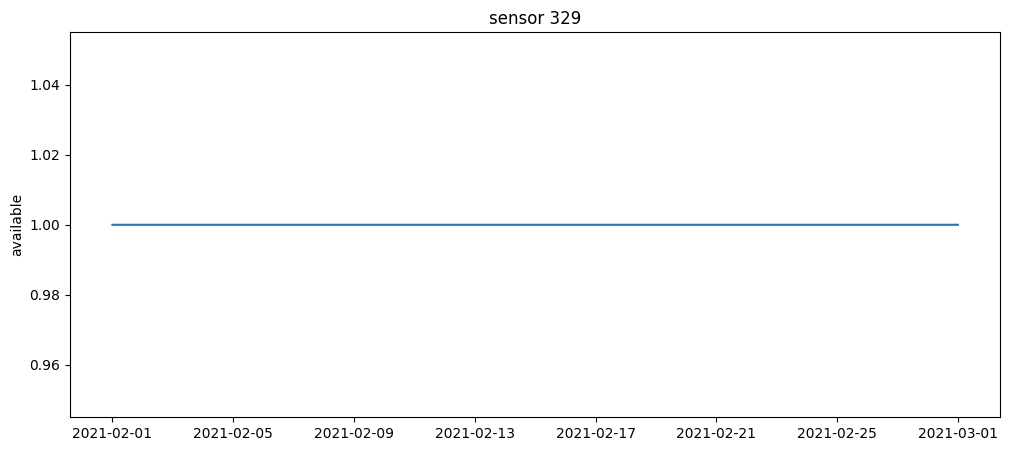

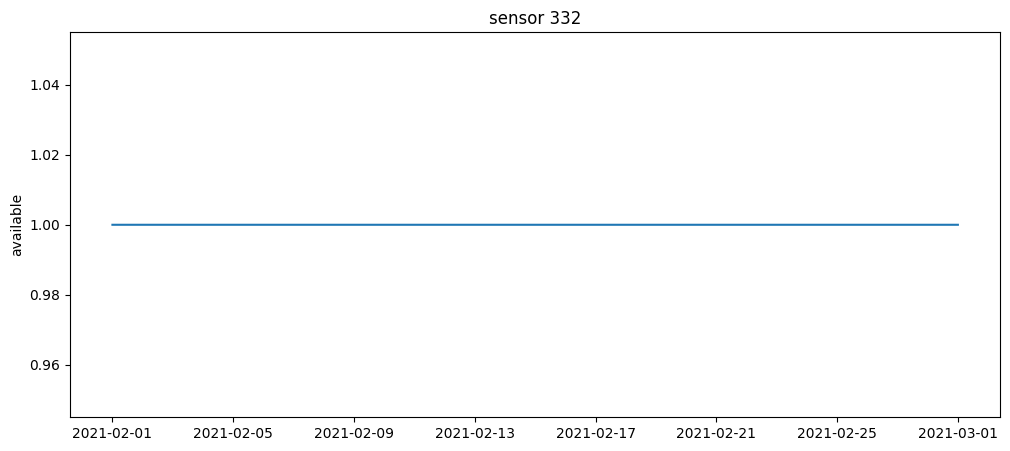

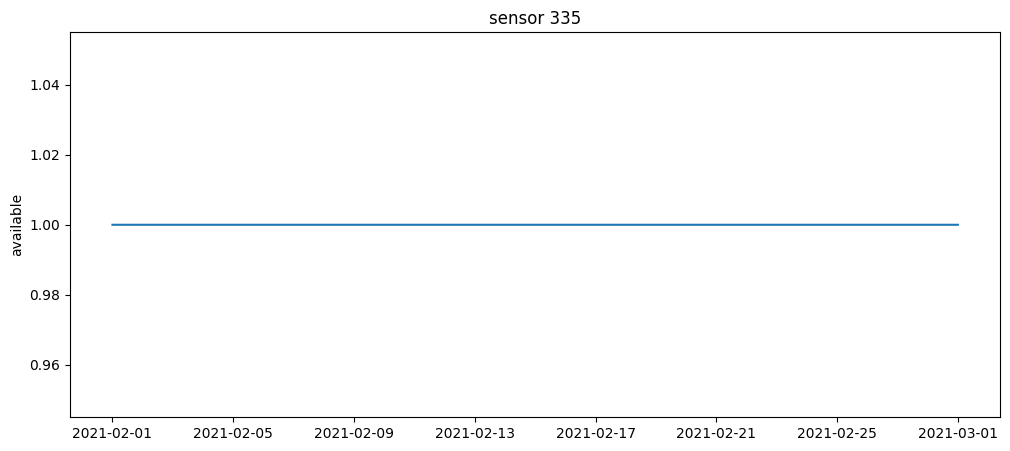

In [20]:
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    plt.figure(figsize= (12,5))
    plt.title('sensor {}'.format(_id))
    plt.ylabel('available')
    plt.plot(df_tmp['gw_time'], df_tmp['available'])

# Position

In [21]:
# sensor_pos = {
#     "290": {"x": 2, "y": 3},
#     "293": {"x": 5, "y": 3},
#     "296": {"x": 3, "y": 8},
#     "299": {"x": 4, "y": 14},
#     "302": {"x": 4, "y": 5}
# }
# freezer_pos = {
#     "308": {"x": 2, "y": 1},
#     "314": {"x": 6, "y": 1},
#     "320": {"x": 8, "y": 10},
#     "326": {"x": 4, "y": 17}
# }

# sensor_pos = pd.DataFrame(sensor_pos).T
# freezer_pos = pd.DataFrame(freezer_pos).T

# sensor_pos = sensor_pos.reset_index()
# freezer_pos = freezer_pos.reset_index()
# pos = pd.concat([sensor_pos,freezer_pos])


In [22]:
# no. 19
sensor_pos = {
    "329": {"x": 16, "y": 5},
    "332": {"x": 10, "y": 5},
    "335": {"x": 4, "y": 5},
    "338": {"x": 18, "y": 1}
}
freezer_pos = {
    "344": {"x": 16, "y": 0},
    "344-1": {"x": 14, "y": 0},
    "362": {"x": 11, "y": 0},
    "362-1": {"x": 8, "y": 0},
    "368": {"x": 4, "y": 0},
    "368-1": {"x": 2, "y": 0}
}
door_pos = {
    "door": {"x": 4, "y": 9}
}

sensor_pos = pd.DataFrame(sensor_pos).T
sensor_pos['type'] = ['sensor']*len(sensor_pos)
freezer_pos = pd.DataFrame(freezer_pos).T
freezer_pos['type'] = ['freezer']*len(freezer_pos)
door_pos = pd.DataFrame(door_pos).T
door_pos['type']= ['door']*len(door_pos)
sensor_pos = sensor_pos.reset_index()
freezer_pos = freezer_pos.reset_index()
door_pos = door_pos.reset_index()
pos = pd.concat([sensor_pos,freezer_pos,door_pos])


In [23]:
# sensor_pos = {
#    "579": {"x": 5, "y": 6} ,
#    "582": {"x": 1, "y": 0} ,
#    "585": {"x": 0, "y": 6} ,
#    "588": {"x": 9, "y": 5} ,
#    "591": {"x": 0, "y": 2} ,
#    "594": {"x": 9, "y": 1}
# }
# freezer_pos = {
#    "600": {"x": 3, "y": 0},
#    "606": {"x": 7, "y": 0}
# }
# door_pos = {
#     "door": {"x": 4, "y": 9}
# }

# sensor_pos = pd.DataFrame(sensor_pos).T
# sensor_pos['type'] = ['sensor']*len(sensor_pos)
# freezer_pos = pd.DataFrame(freezer_pos).T
# freezer_pos['type'] = ['freezer']*len(freezer_pos)
# door_pos = pd.DataFrame(door_pos).T
# door_pos['type']= ['door']*len(door_pos)
# sensor_pos = sensor_pos.reset_index()
# freezer_pos = freezer_pos.reset_index()
# door_pos = door_pos.reset_index()
# pos = pd.concat([sensor_pos,freezer_pos,door_pos])


In [24]:
def display_position(pos):
    plt.figure(figsize = (12,10))
    sns.scatterplot(
        x = 'x', 
        y = 'y', 
        data = pos, 
        hue = 'index', 
        style='type',
        s = 70
        )
    # sensor
    for _id in sensor_id:
        x = sensor_pos[sensor_pos['index'] == str(_id)]['x']
        y = sensor_pos[sensor_pos['index'] == str(_id)]['y']
        plt.annotate(str(_id)+'(sensor)', xy = (x,y), xytext=(x, y-1), fontsize = 10, ha = 'center', arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10)) 
    
    # # freezer
    for _id in freezer_id:
        x = freezer_pos[freezer_pos['index'] == str(_id)]['x']
        y = freezer_pos[freezer_pos['index'] == str(_id)]['y']
        plt.annotate(str(_id)+'(freezer)', xy = (x,y), xytext=(x, y-1), fontsize = 10, ha = 'center', arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10)) 

    plt.annotate('door', xy=(pos[pos['type'] == 'door']['x'], pos[pos['type'] == 'door']['y']), xytext=(pos[pos['type'] == 'door']['x'],pos[pos['type'] == 'door']['y']-1),
                fontsize=10, ha='center',
                arrowprops=dict(facecolor='blue', width=1, shrink=0.1, headwidth=10))
            

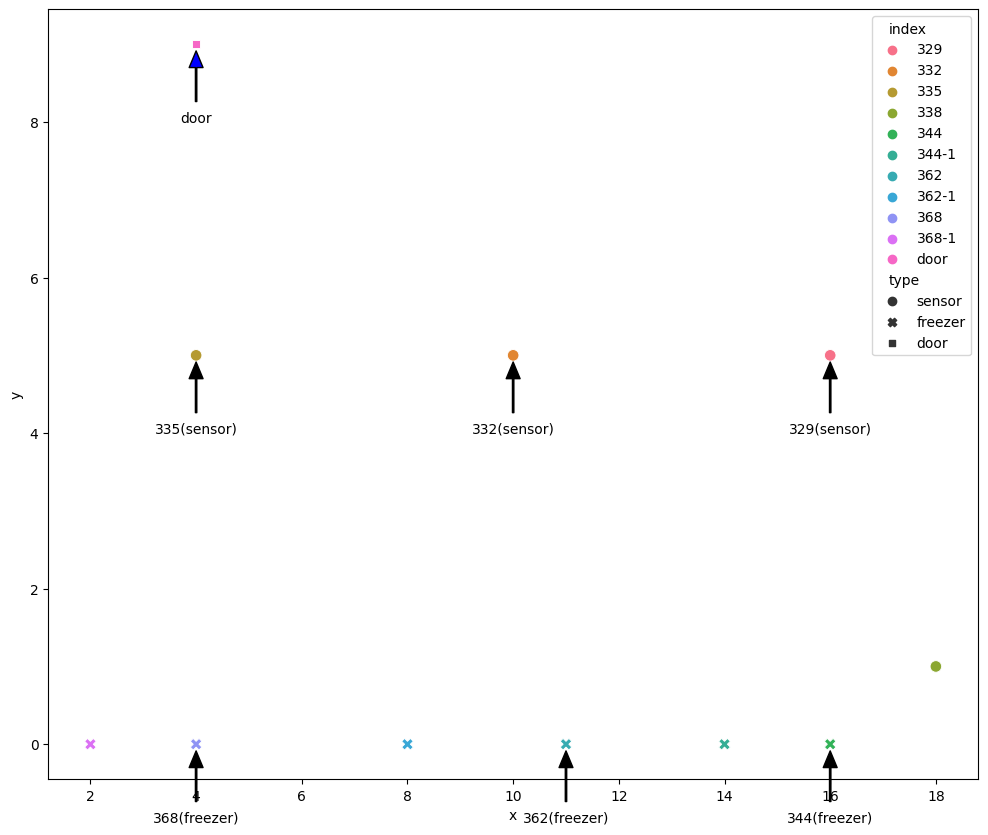

In [25]:
display_position(pos)

# Test

## test for sensor: 329 freezer: 344, 362

In [26]:
test_s = df_sensor[df_sensor['sensor_id'] == 329]
test_f1 = df_freezer[df_freezer['freezer_id'] == 344]
test_f2 = df_freezer[df_freezer['freezer_id'] == 362]

### test1 s: 338, f: 344

In [27]:
test1 = pd.merge_asof(
    left=test_f1.sort_values(by="gw_time"),
    right=test_s.sort_values(by="gw_time"),
    on="gw_time",
    direction="nearest",
    tolerance=pd.Timedelta("30 second"),
    allow_exact_matches=False,
    suffixes=("_freezer", "_sensor"),
)

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_11864\882176881.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test1.corr(), linewidths = 0.1, vmax = 1.0,


<AxesSubplot: title={'center': 'Person Correlation of Features'}>

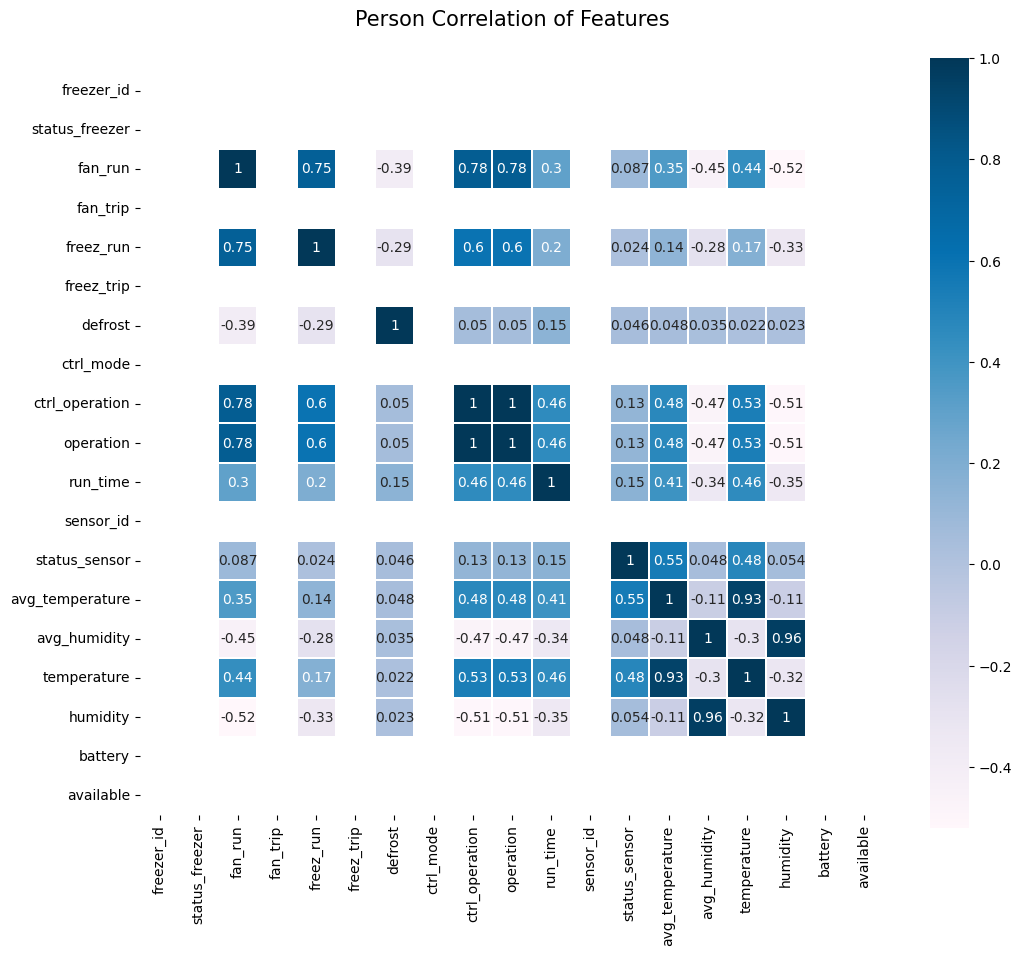

In [28]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12, 10))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(test1.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

### test2 s: 338, f: 362

In [29]:
test2 = pd.merge_asof(
    left=test_f2.sort_values(by="gw_time"),
    right=test_s.sort_values(by="gw_time"),
    on="gw_time",
    direction="nearest",
    tolerance=pd.Timedelta("30 second"),
    allow_exact_matches=False,
    suffixes=("_freezer", "_sensor"),
)

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_11864\206199652.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test2.corr(), linewidths = 0.1, vmax = 1.0,


<AxesSubplot: title={'center': 'Person Correlation of Features'}>

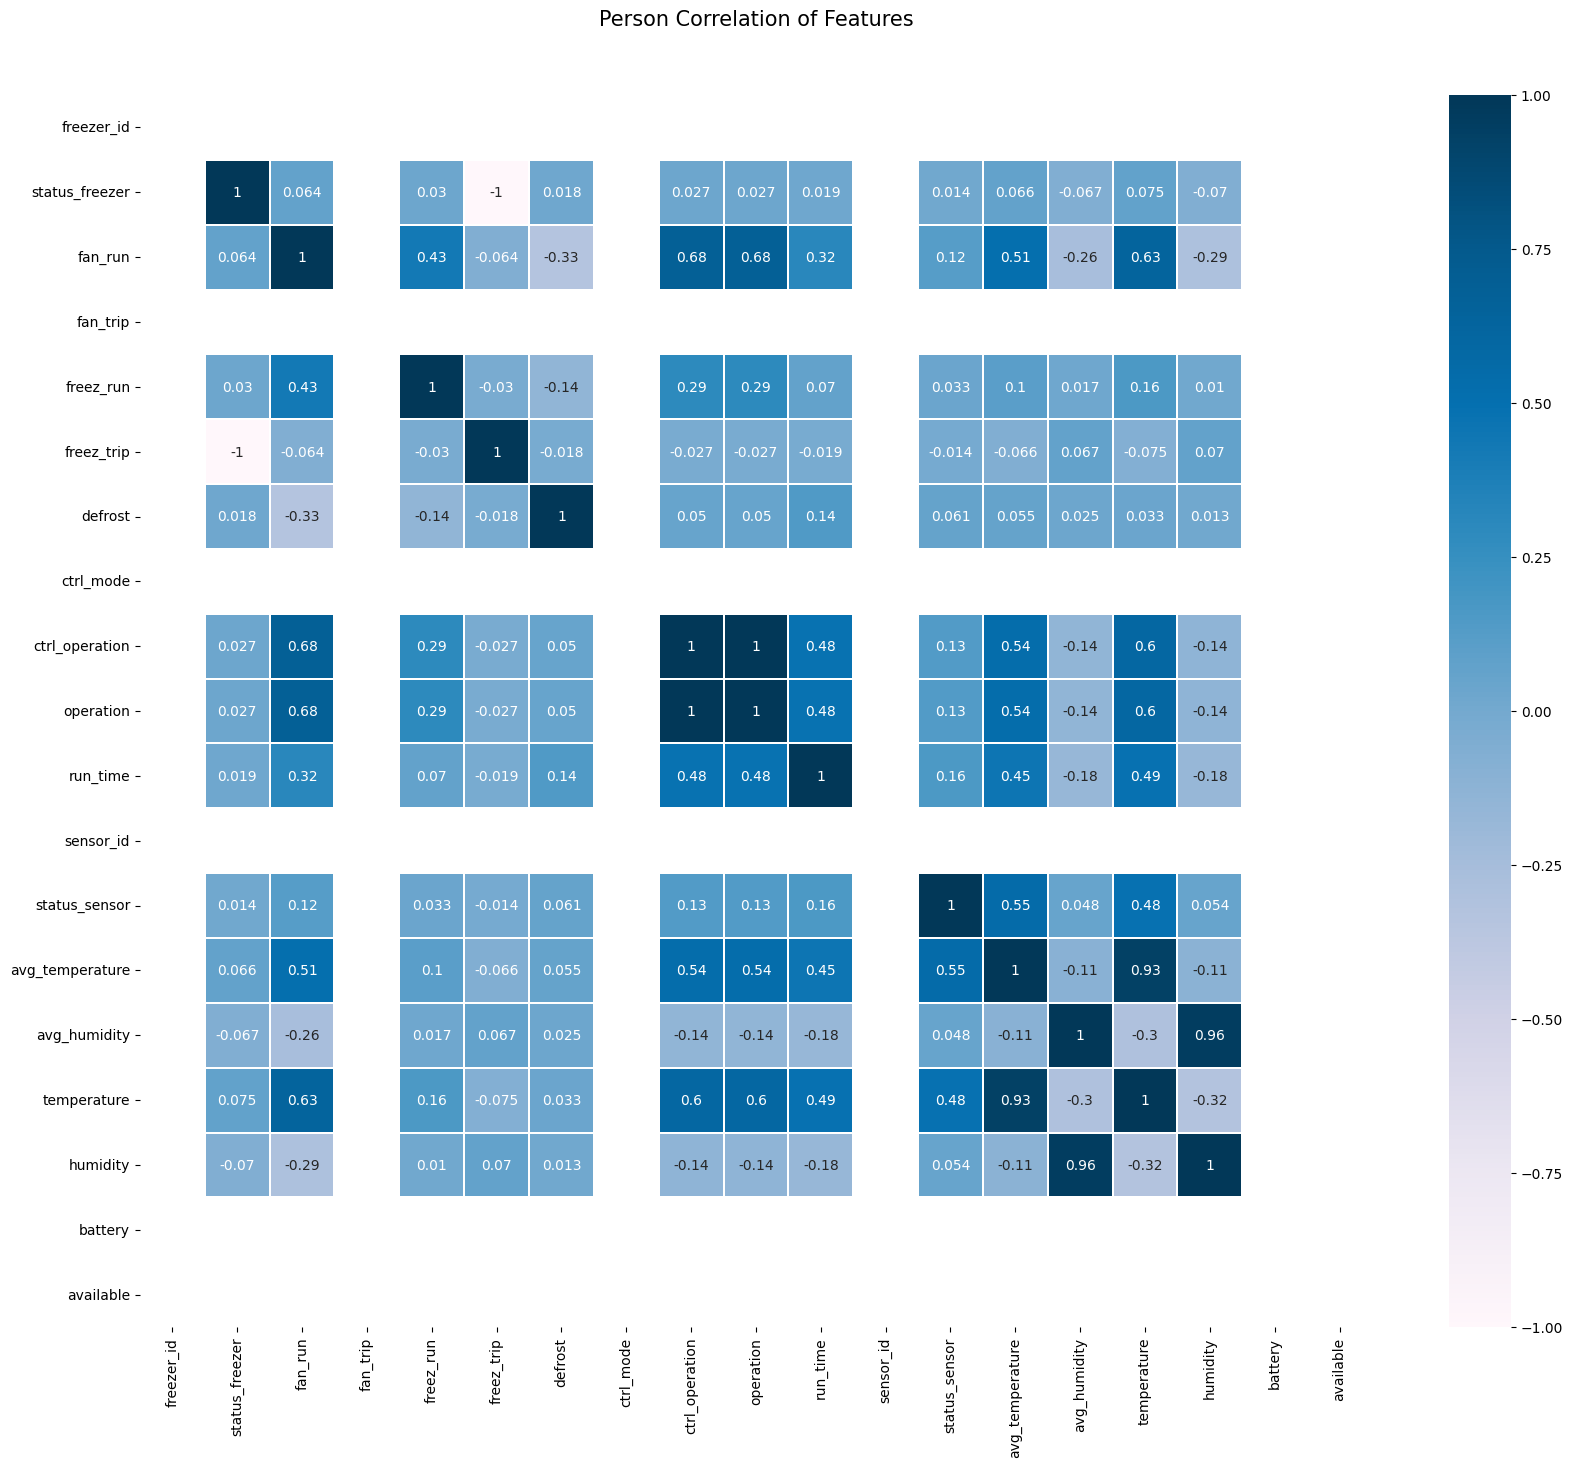

In [30]:
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 16))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(test2.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

# Mapping

## melt id to columns

In [31]:
df0 = df_freezer.copy()['gw_time']
for _id in df_freezer['freezer_id'].unique():
    df_tmp = df_freezer[df_freezer['freezer_id'] == _id]
    df_tmp.reset_index(drop = True)
    df_tmp.drop(columns= ['freezer_id'], inplace= True)
    df_tmp.columns = ['gw_time']+[x+'_'+str(_id) for x in df_freezer.columns if x not in ['freezer_id','gw_time']]
    df0 = pd.merge(df0, df_tmp, on = 'gw_time', how = 'outer')

melted_freezer = df0


C:\Users\Intellicode\AppData\Local\Temp\ipykernel_11864\611674277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.drop(columns= ['freezer_id'], inplace= True)
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_11864\611674277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.drop(columns= ['freezer_id'], inplace= True)
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_11864\611674277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [32]:
df0 = df_sensor.copy()['gw_time']
for _id in df_sensor['sensor_id'].unique():
    df_tmp = df_sensor[df_sensor['sensor_id'] == _id]
    df_tmp.reset_index(drop = True)
    df_tmp.drop(columns= ['sensor_id'], inplace= True)
    df_tmp.columns = ['gw_time']+[x+'_'+str(_id) for x in df_sensor.columns if x not in ['sensor_id','gw_time']]
    df0 = pd.merge(df0, df_tmp, on = 'gw_time', how = 'outer')

melted_sensor = df0

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_11864\1020320345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.drop(columns= ['sensor_id'], inplace= True)
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_11864\1020320345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.drop(columns= ['sensor_id'], inplace= True)
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_11864\1020320345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [33]:
melted_df = pd.merge_asof(
    left=melted_sensor.sort_values(by="gw_time"),
    right=melted_freezer.sort_values(by="gw_time"),
    on="gw_time",
    direction="nearest",
    tolerance=pd.Timedelta("30 second"),
    allow_exact_matches=False,
    suffixes=("_freezer", "_sensor"),
)
melted_df.drop_duplicates(inplace= True, ignore_index= True)

In [34]:
melted_df

gw_time  status_329  avg_temperature_329  avg_humidity_329  \
0     2021-02-01 00:00:04           1               -20.27             59.98   
1     2021-02-01 00:00:34           1               -20.28             59.94   
2     2021-02-01 00:01:04           1               -20.28             59.98   
3     2021-02-01 00:01:35           1               -20.27             60.02   
4     2021-02-01 00:02:05           1               -20.27             60.05   
...                   ...         ...                  ...               ...   
80124 2021-02-28 23:57:33           1               -19.81             46.37   
80125 2021-02-28 23:58:03           1               -19.81             46.37   
80126 2021-02-28 23:58:33           1               -19.79             46.37   
80127 2021-02-28 23:59:03           1               -19.79             46.35   
80128 2021-02-28 23:59:34           1               -19.78             46.33   

       temperature_329  humidity_329  battery_329  available_329  status_332  \
0               -20.30         63.48          100              1           1   
1               -20.31         63.46          100              1           1   
2               -20.31         63.42          100              1           1   
3               -20.31         63.39          100              1           1   
4               -20.30         63.36          100              1           1   
...                ...           ...          ...            ...         ...   
80124           -18.94         45.02          100              1           1   
80125           -18.95         44.98          100              1           1   
80126           -18.93         45.00          100              1           1   
80127           -18.95         44.98          100              1           1   
80128           -18.93         44.99          100              1           1   

       avg_temperature_332  ...  status_368  fan_run_368  fan_trip_368  \
0                   -20.27  ...         1.0          1.0           0.0   
1                   -20.28  ...         1.0          1.0           0.0   
2                   -20.28  ...         1.0          1.0           0.0   
3                   -20.27  ...         1.0          1.0           0.0   
4                   -20.27  ...         1.0          1.0           0.0   
...                    ...  ...         ...          ...           ...   
80124               -19.81  ...         1.0          1.0           0.0   
80125               -19.81  ...         1.0          1.0           0.0   
80126               -19.79  ...         1.0          1.0           0.0   
80127               -19.79  ...         1.0          1.0           0.0   
80128               -19.78  ...         1.0          1.0           0.0   

       freez_run_368  freez_trip_368  defrost_368  ctrl_mode_368  \
0                1.0             0.0          0.0            1.0   
1                1.0             0.0          0.0            1.0   
2                1.0             0.0          0.0            1.0   
3                1.0             0.0          0.0            1.0   
4                1.0             0.0          0.0            1.0   
...              ...             ...          ...            ...   
80124            1.0             0.0          0.0            1.0   
80125            1.0             0.0          0.0            1.0   
80126            1.0             0.0          0.0            1.0   
80127            1.0             0.0          0.0            1.0   
80128            1.0             0.0          0.0            1.0   

       ctrl_operation_368  operation_368  run_time_368  
0                     1.0            1.0           0.0  
1                     1.0            1.0           0.0  
2                     1.0            1.0           1.0  
3                     1.0            1.0           1.0  
4                     1.0            1.0           2.0  
...                   ...            ...        

## delta temperture (dT)

In [35]:
# melted_df['dT_335'] = melted_df['temperature_335'] - melted_df.temperature_335.shift(1).fillna(melted_df['temperature_335'][0])
# melted_df['dT_332'] = melted_df['temperature_332'] - melted_df.temperature_332.shift(1).fillna(melted_df['temperature_332'][0])
# melted_df['dT_329'] = melted_df['temperature_329'] - melted_df.temperature_329.shift(1).fillna(melted_df['temperature_329'][0])

for _id in sensor_id:
    melted_df['dT_'+str(_id)] =  melted_df['temperature_'+str(_id)] - melted_df['temperature_'+str(_id)].shift(1).fillna(melted_df['temperature_'+str(_id)][0])


C:\Users\Intellicode\AppData\Local\Temp\ipykernel_11864\4222379397.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(sensor_id),1,i)


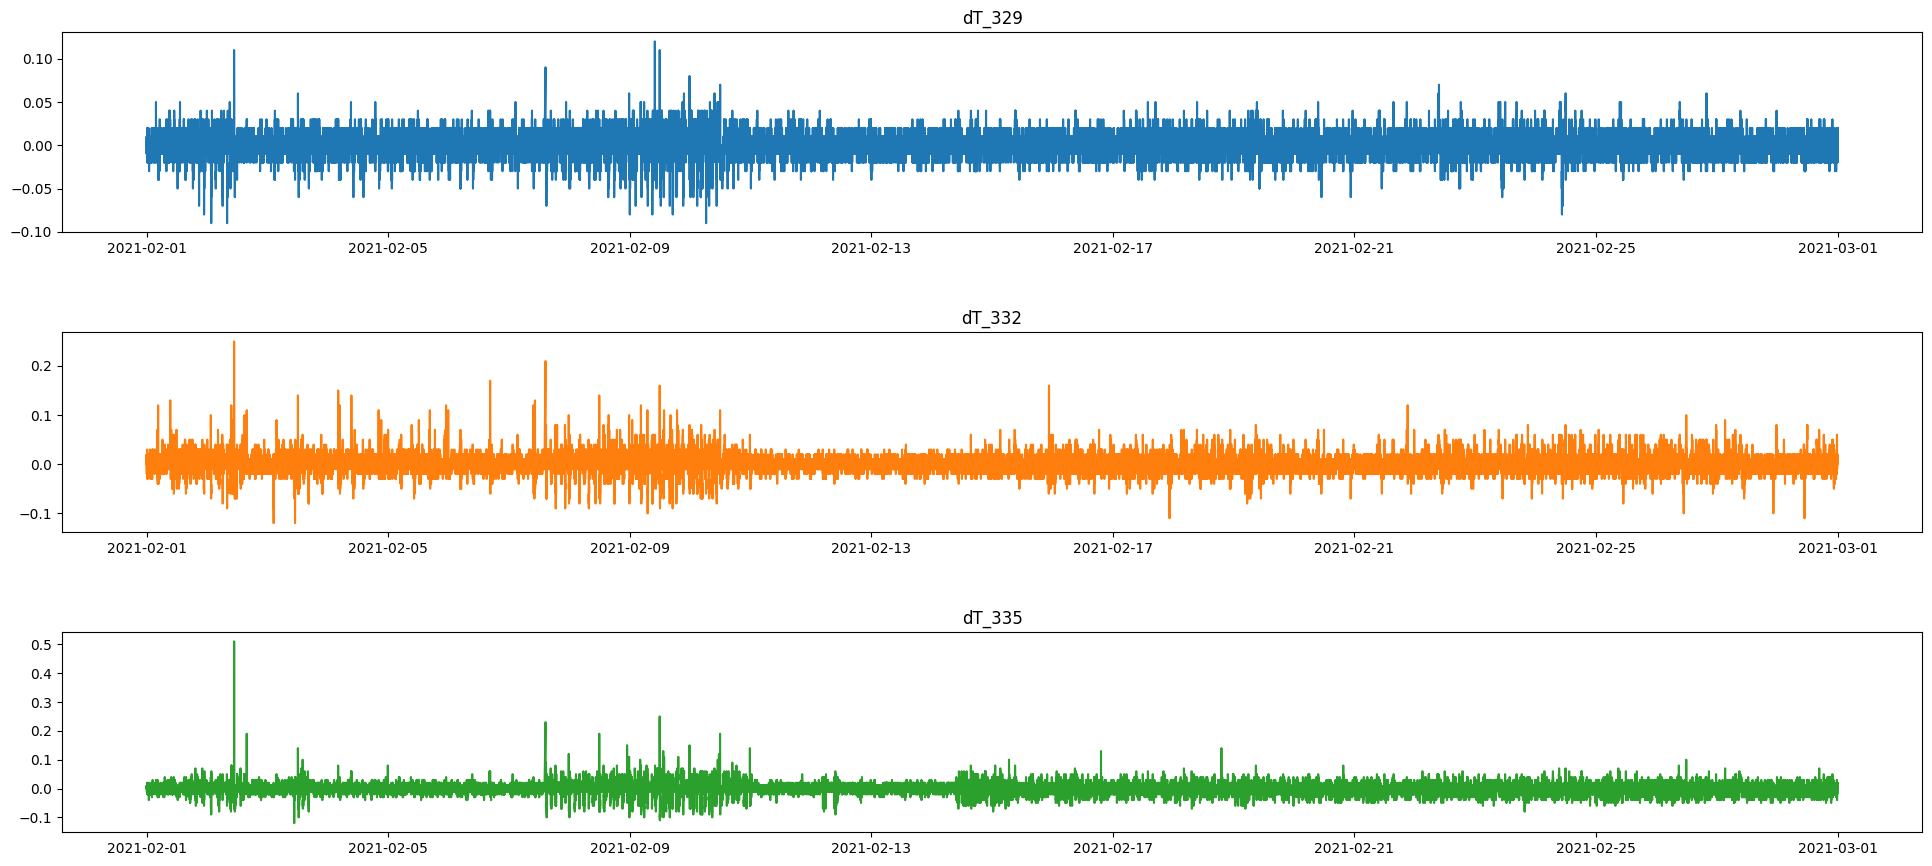

In [36]:
plt.figure(figsize = (24,10))
plt.title('delta temperature of sensors')
i = 1
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for _id in sensor_id:
    plt.subplot(len(sensor_id),1,i)
    plt.title('dT'+'_'+str(_id))
    plt.plot(melted_df['gw_time'],melted_df['dT'+'_'+str(_id)], label = 'dT'+'_'+str(_id),alpha = 1, color = colors[i-1])
    i+=1
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)
plt.show()

## 가동에 따른 온도 변화 살펴보기

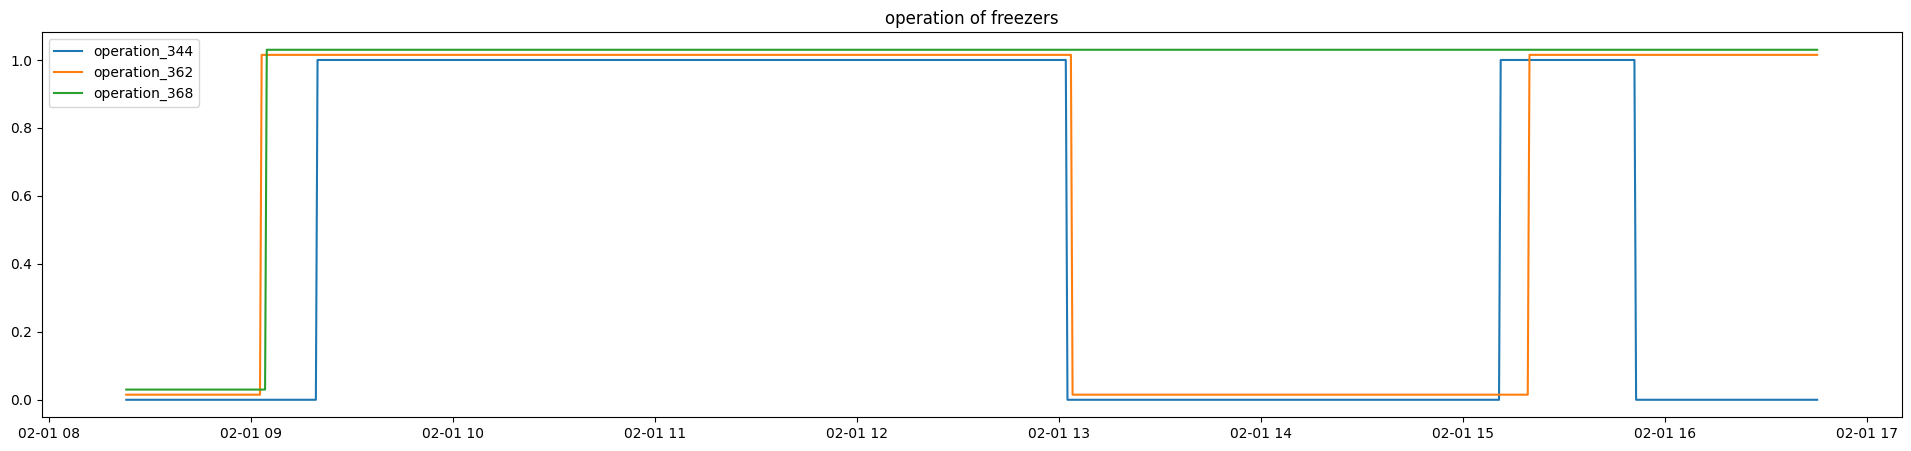

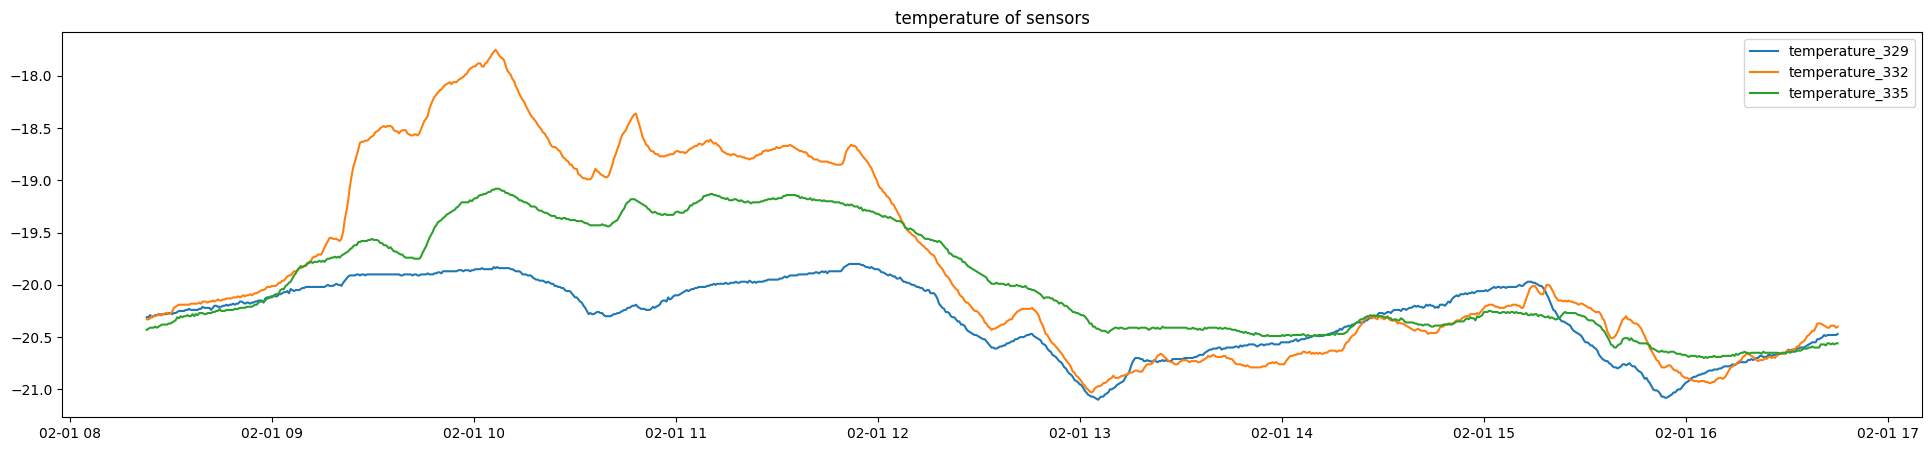

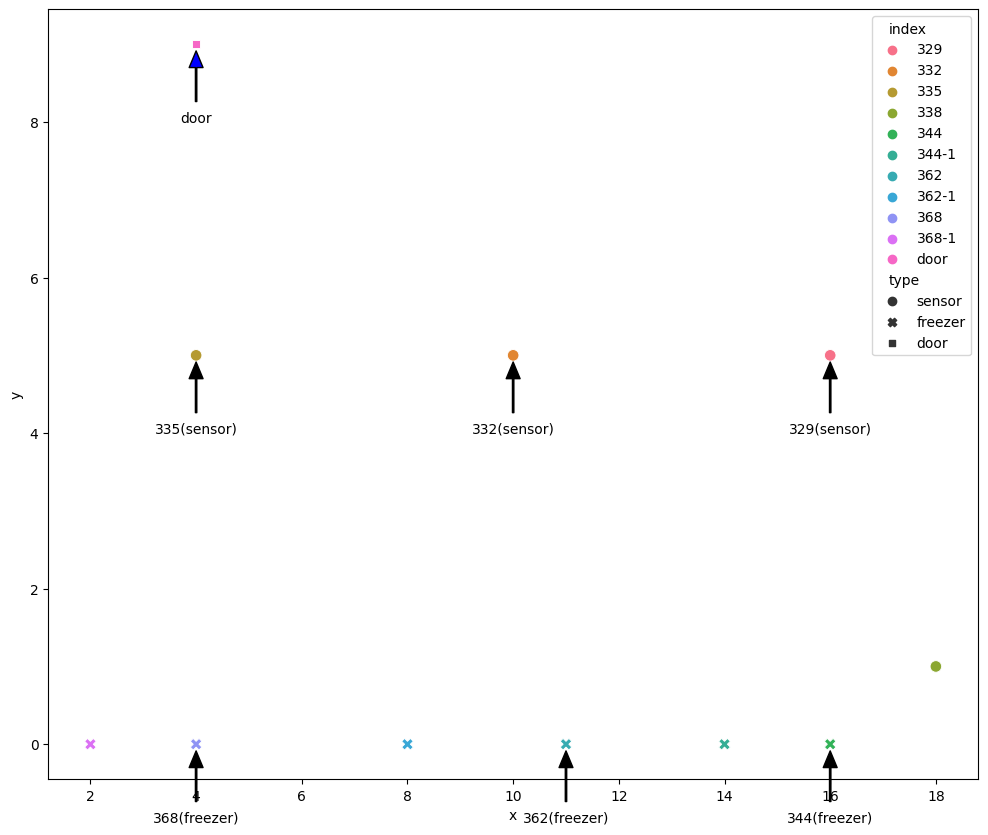

In [37]:
test_figure = melted_df[1000:2000]
plt.figure(figsize = (24,5))
plt.title("operation of freezers")
w = 0
for _id in freezer_id:
    plt.plot(test_figure['gw_time'],test_figure['operation'+'_'+str(_id)]+w, label = 'operation'+'_'+str(_id),alpha = 1)
    w+= 0.015
plt.legend()
plt.show()


plt.figure(figsize = (24,5))
plt.title('temperature of sensors')
for _id in sensor_id:
    plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
plt.legend()
plt.show()

display_position(pos)

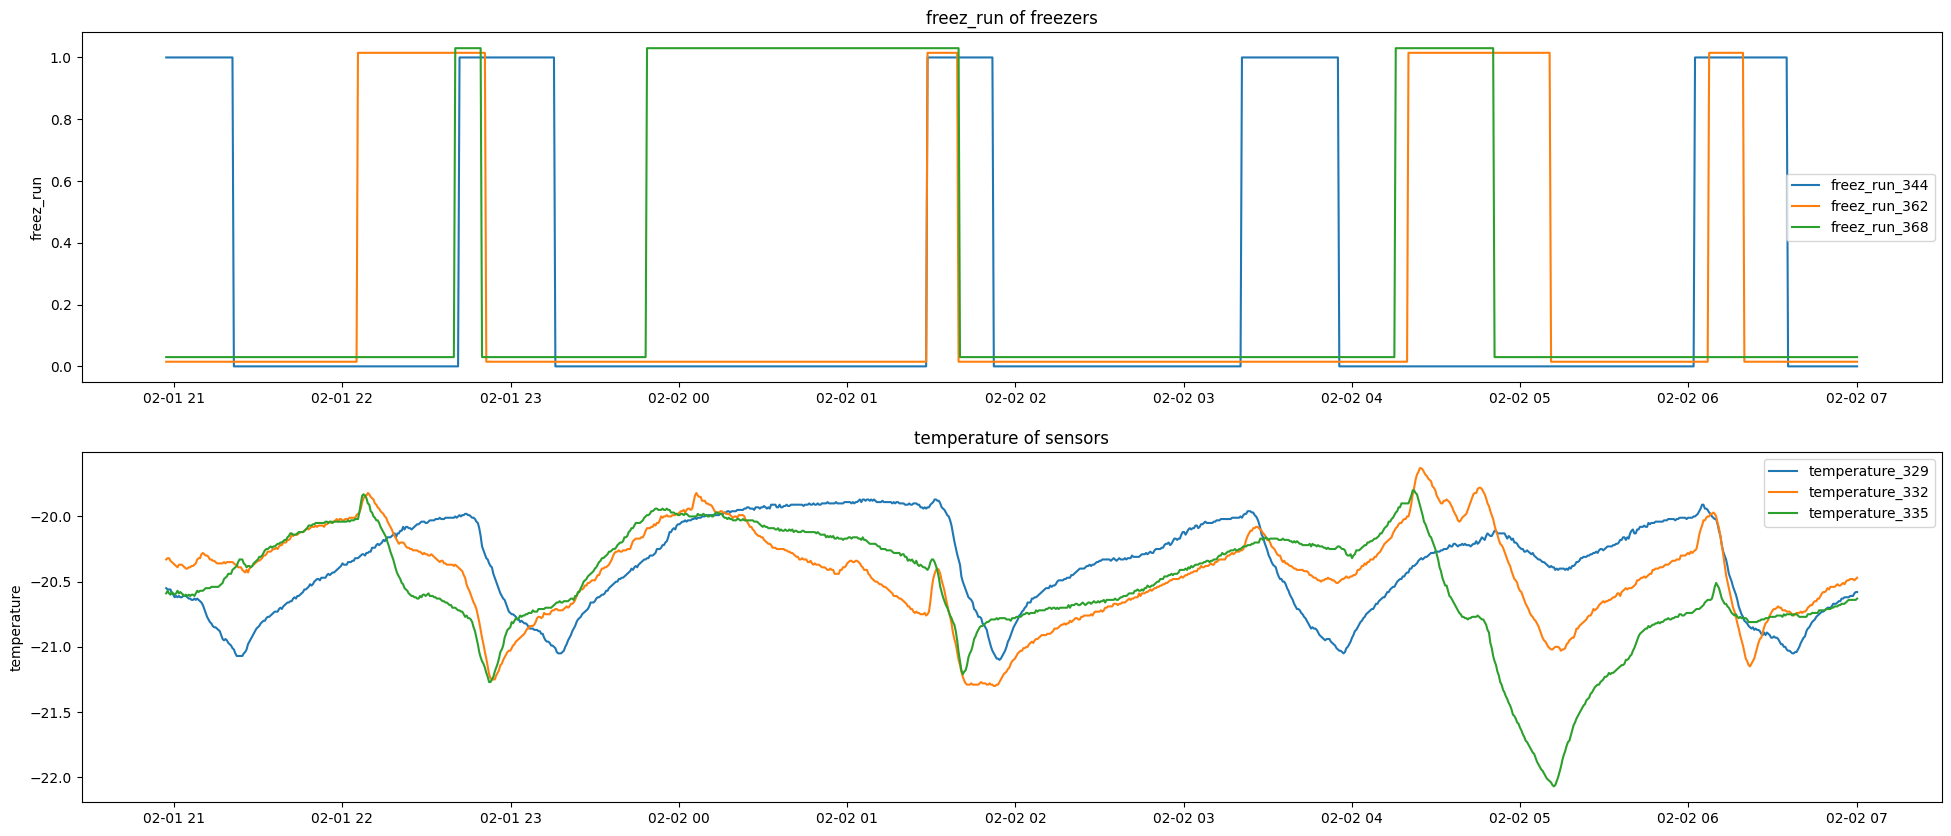

In [38]:
test_figure = melted_df[2500:3700]
plt.figure(figsize = (24,10))

plt.subplot(2,1,1)
plt.title("freez_run of freezers")
w = 0
for _id in freezer_id:
    plt.plot(test_figure['gw_time'],test_figure['freez_run'+'_'+str(_id)]+w, label = 'freez_run'+'_'+str(_id),alpha = 1)
    w+= 0.015
plt.ylabel('freez_run')
plt.legend()

plt.subplot(2,1,2)
plt.title('temperature of sensors')
for _id in sensor_id:
    plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
plt.ylabel('temperature')
plt.legend()
plt.show()


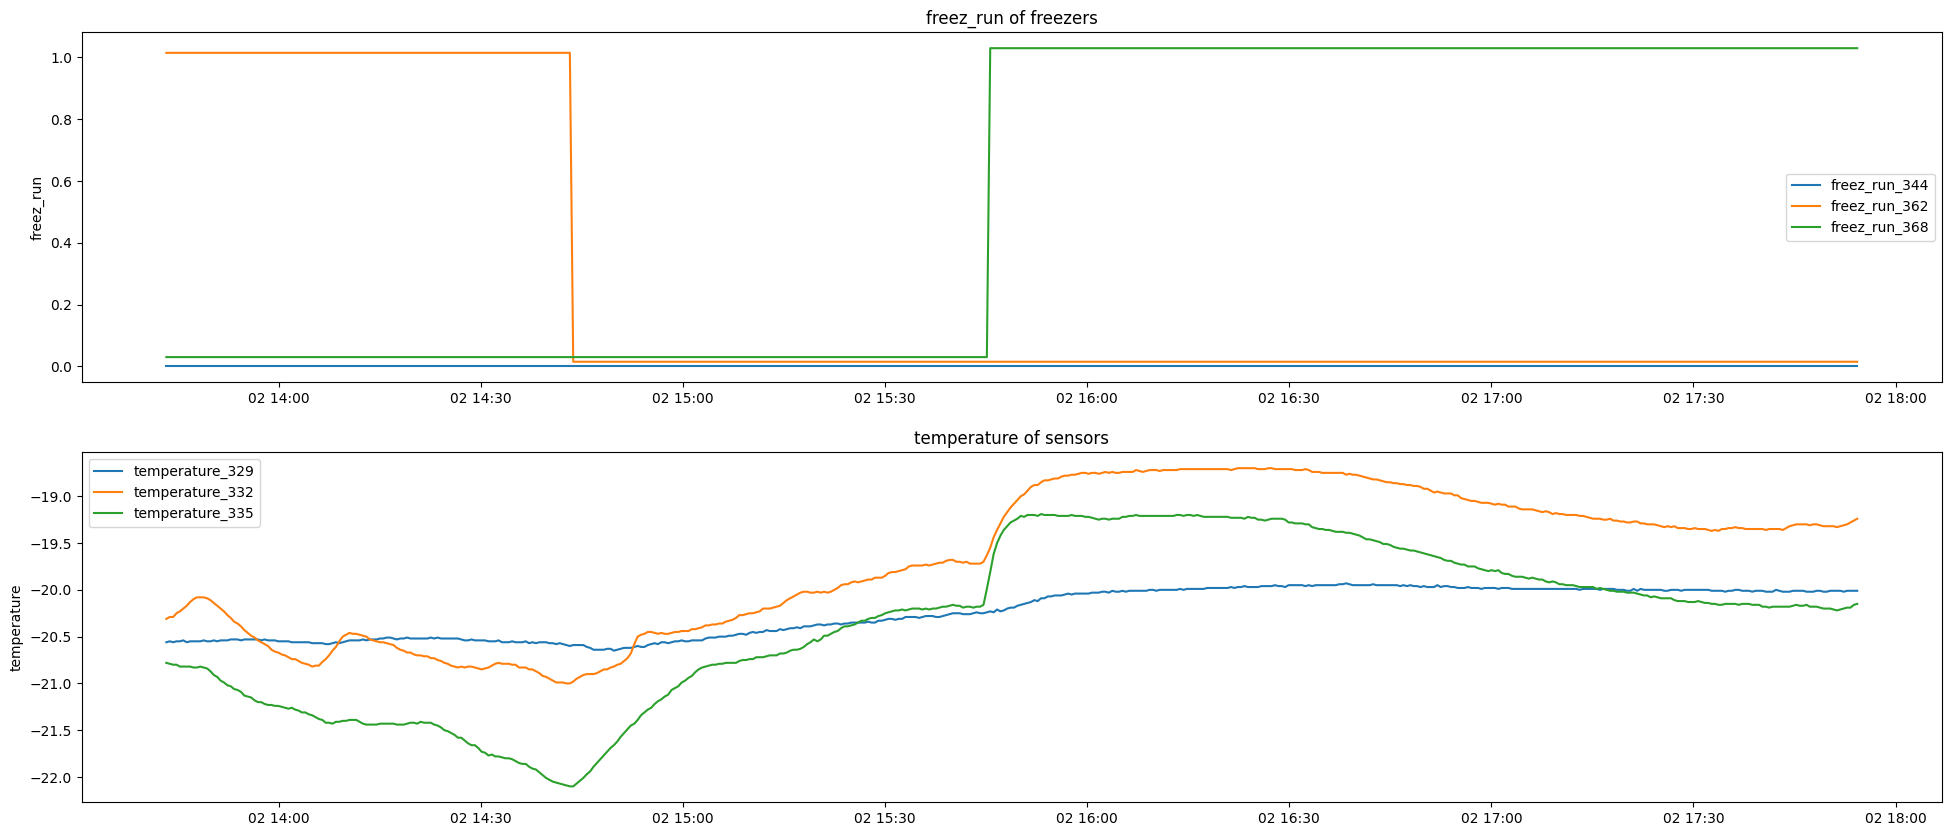

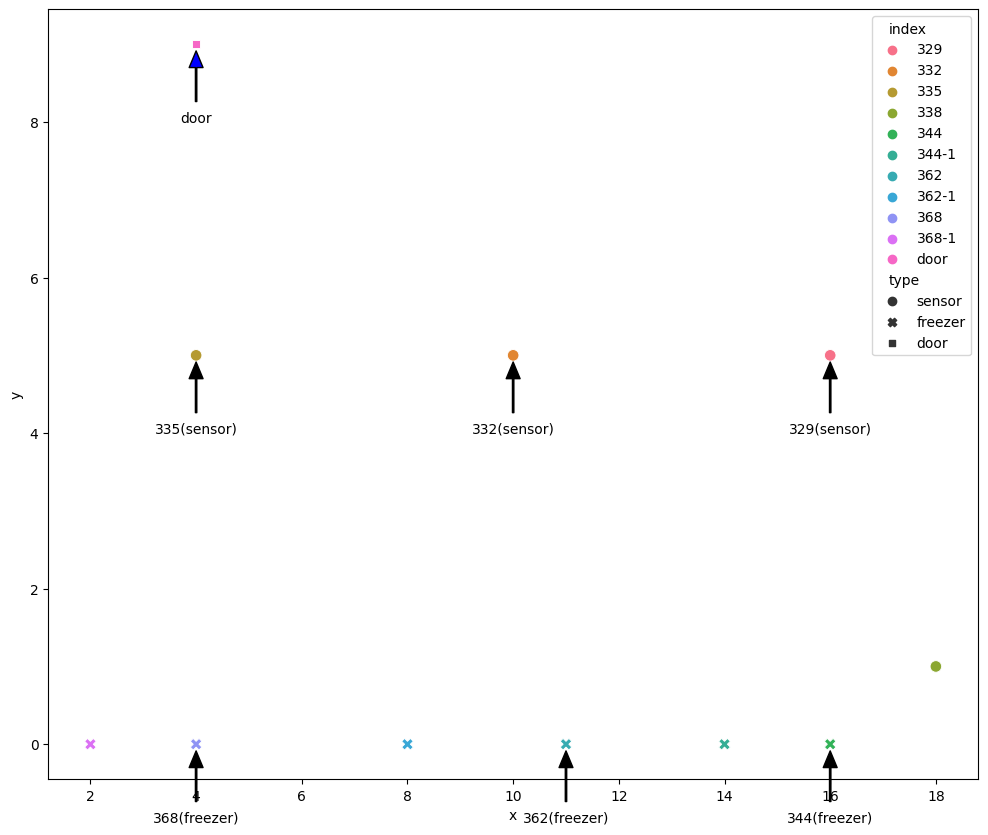

In [39]:
test_figure = melted_df[4500:5000]
plt.figure(figsize = (24,10))

plt.subplot(2,1,1)
plt.title("freez_run of freezers")
w = 0
for _id in freezer_id:
    plt.plot(test_figure['gw_time'],test_figure['freez_run'+'_'+str(_id)]+w, label = 'freez_run'+'_'+str(_id),alpha = 1)
    w+= 0.015
plt.ylabel('freez_run')
plt.legend()

plt.subplot(2,1,2)
plt.title('temperature of sensors')
for _id in sensor_id:
    plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
plt.ylabel('temperature')
plt.legend()
plt.show()

display_position(pos)

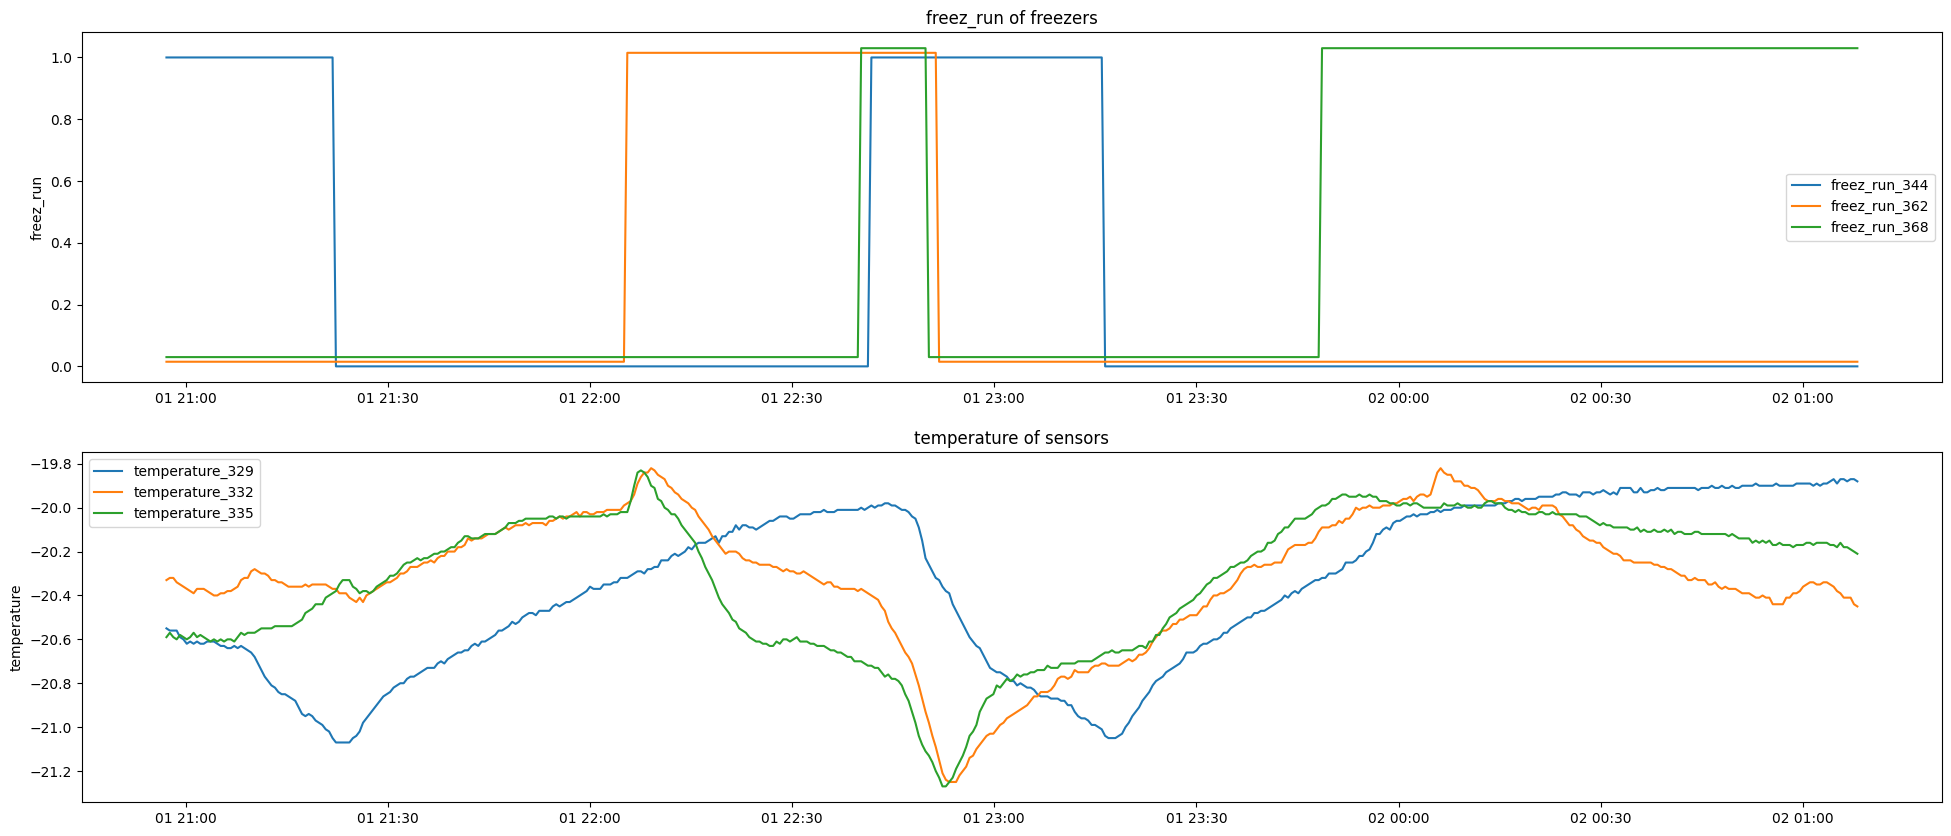

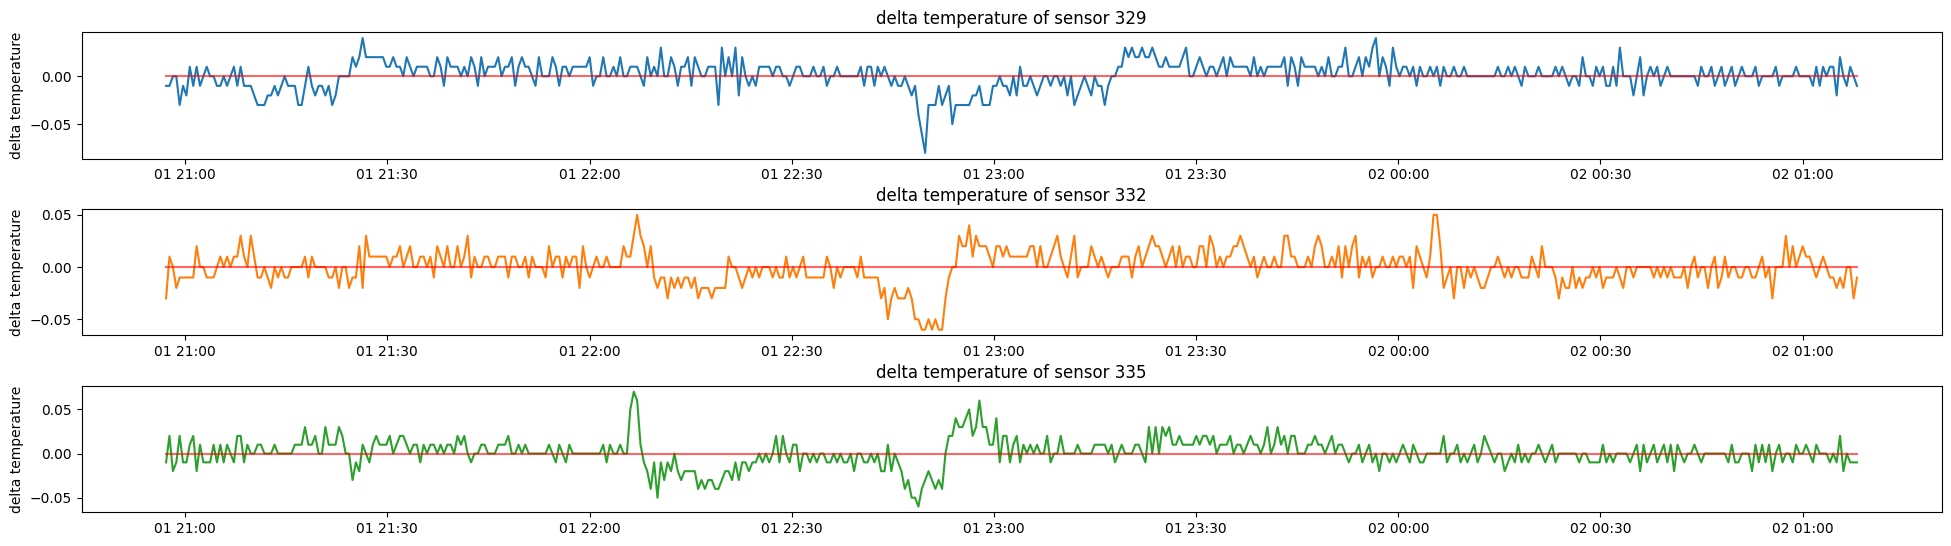

In [40]:
test_figure = melted_df[2500:3000]
plt.figure(figsize = (24,10))

plt.subplot(2,1,1)
plt.title("freez_run of freezers")
w = 0
for _id in freezer_id:
    plt.plot(test_figure['gw_time'],test_figure['fan_run'+'_'+str(_id)]+w, label = 'freez_run'+'_'+str(_id),alpha = 1)
    w+= 0.015
plt.ylabel('freez_run')
plt.legend()

plt.subplot(2,1,2)
plt.title('temperature of sensors')
for _id in sensor_id:
    plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
plt.ylabel('temperature')
plt.legend()
plt.show()

i = 1
plt.figure(figsize = (24,len(sensor_id)*2))
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for _id in sensor_id:
    plt.subplot(len(sensor_id),1,i)
    plt.title('delta temperature of sensor '+str(_id), loc= 'center')
    plt.plot(test_figure['gw_time'],test_figure['dT'+'_'+str(_id)], label = 'dT'+'_'+str(_id),alpha = 1, color = colors[i-1])
    plt.plot(test_figure['gw_time'], [0]*len(test_figure), color = 'r', alpha = 0.6)
    plt.ylabel('delta temperature')
    i+=1
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

## correlation between condition of freezer and temperature, humidity
- 온도가 올라가면 freezer를 가동한다, 가동하면 온도가 떨어진다. -> freezer 가동과 온도의 상관관계 오히려 양수로 나옴
- fan을 가동하면 humidity가 떨어진다.

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaled_df = melted_df.copy()
scaler = MinMaxScaler()
float_columns = ['temperature','humidity','dT']
for _id in sensor_id:
    for col in float_columns:
        scaled_df[str(col)+'_'+str(_id)] = scaler.fit_transform(scaled_df[str(col)+'_'+str(_id)].values.reshape(-1,1))

In [42]:
sensor_cols = ['temperature','humidity']
freezer_cols = ['fan_run','freez_run','operation']
corr0 = scaled_df[[x+'_'+str(_id) for x in freezer_cols for _id in freezer_id] + [x+'_'+str(_id) for x in sensor_cols for _id in sensor_id]].corr()

<AxesSubplot: title={'center': 'correlation between condition of freezer and temperature'}>

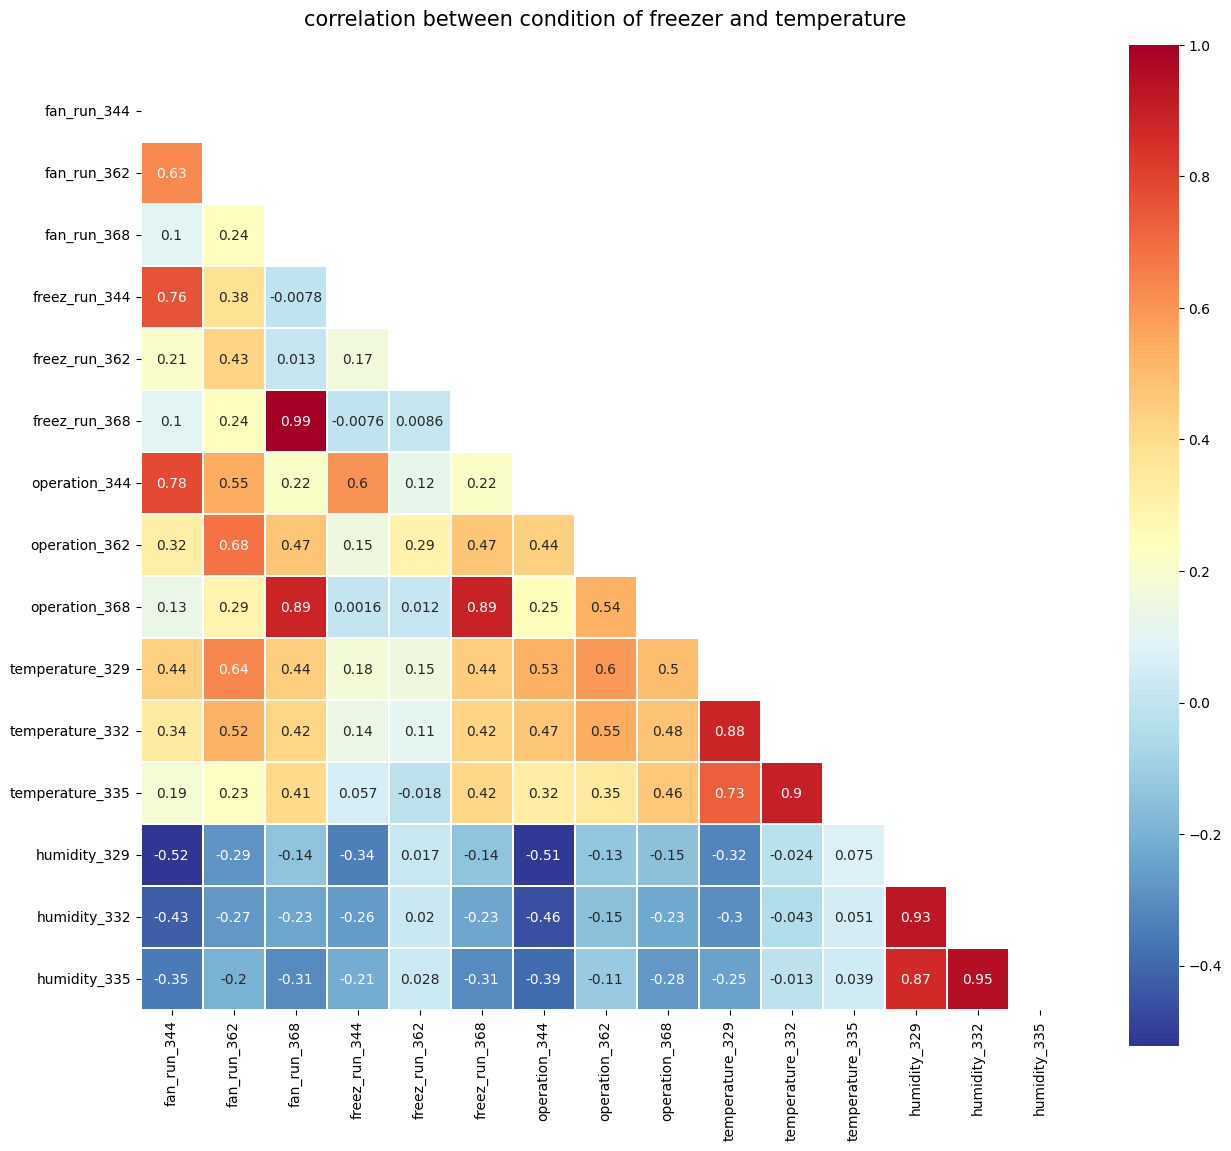

In [43]:
mask = np.zeros_like(corr0, dtype= np.bool_)
mask[np.triu_indices_from(mask)] = True

colormap = plt.cm.PuBu
plt.figure(figsize=(15, 13))
plt.title("correlation between condition of freezer and temperature", y = 1.05, size = 15)
sns.heatmap(corr0, linewidths = 0.1,mask= mask, vmax = 1.0,square = True, cmap = 'RdYlBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 10})



In [44]:
melted_df.columns

Index(['gw_time', 'status_329', 'avg_temperature_329', 'avg_humidity_329',
       'temperature_329', 'humidity_329', 'battery_329', 'available_329',
       'status_332', 'avg_temperature_332', 'avg_humidity_332',
       'temperature_332', 'humidity_332', 'battery_332', 'available_332',
       'status_335', 'avg_temperature_335', 'avg_humidity_335',
       'temperature_335', 'humidity_335', 'battery_335', 'available_335',
       'status_344', 'fan_run_344', 'fan_trip_344', 'freez_run_344',
       'freez_trip_344', 'defrost_344', 'ctrl_mode_344', 'ctrl_operation_344',
       'operation_344', 'run_time_344', 'status_362', 'fan_run_362',
       'fan_trip_362', 'freez_run_362', 'freez_trip_362', 'defrost_362',
       'ctrl_mode_362', 'ctrl_operation_362', 'operation_362', 'run_time_362',
       'status_368', 'fan_run_368', 'fan_trip_368', 'freez_run_368',
       'freez_trip_368', 'defrost_368', 'ctrl_mode_368', 'ctrl_operation_368',
       'operation_368', 'run_time_368', 'dT_329', 'dT_332'

In [45]:
corr_cols = [str(f_col)+'_'+str(_id) for f_col in df_freezer.columns if f_col not in ['freezer_id','gw_time','status','run_time'] for _id in freezer_id] + [str(s_col)+'_'+str(_id) for s_col in ['temperature','humidity','dT'] for _id in sensor_id]
scaled_df1 = scaled_df[corr_cols]
corr1 = scaled_df1.corr()

<AxesSubplot: title={'center': 'correlation between condition of freezer and temperature'}>

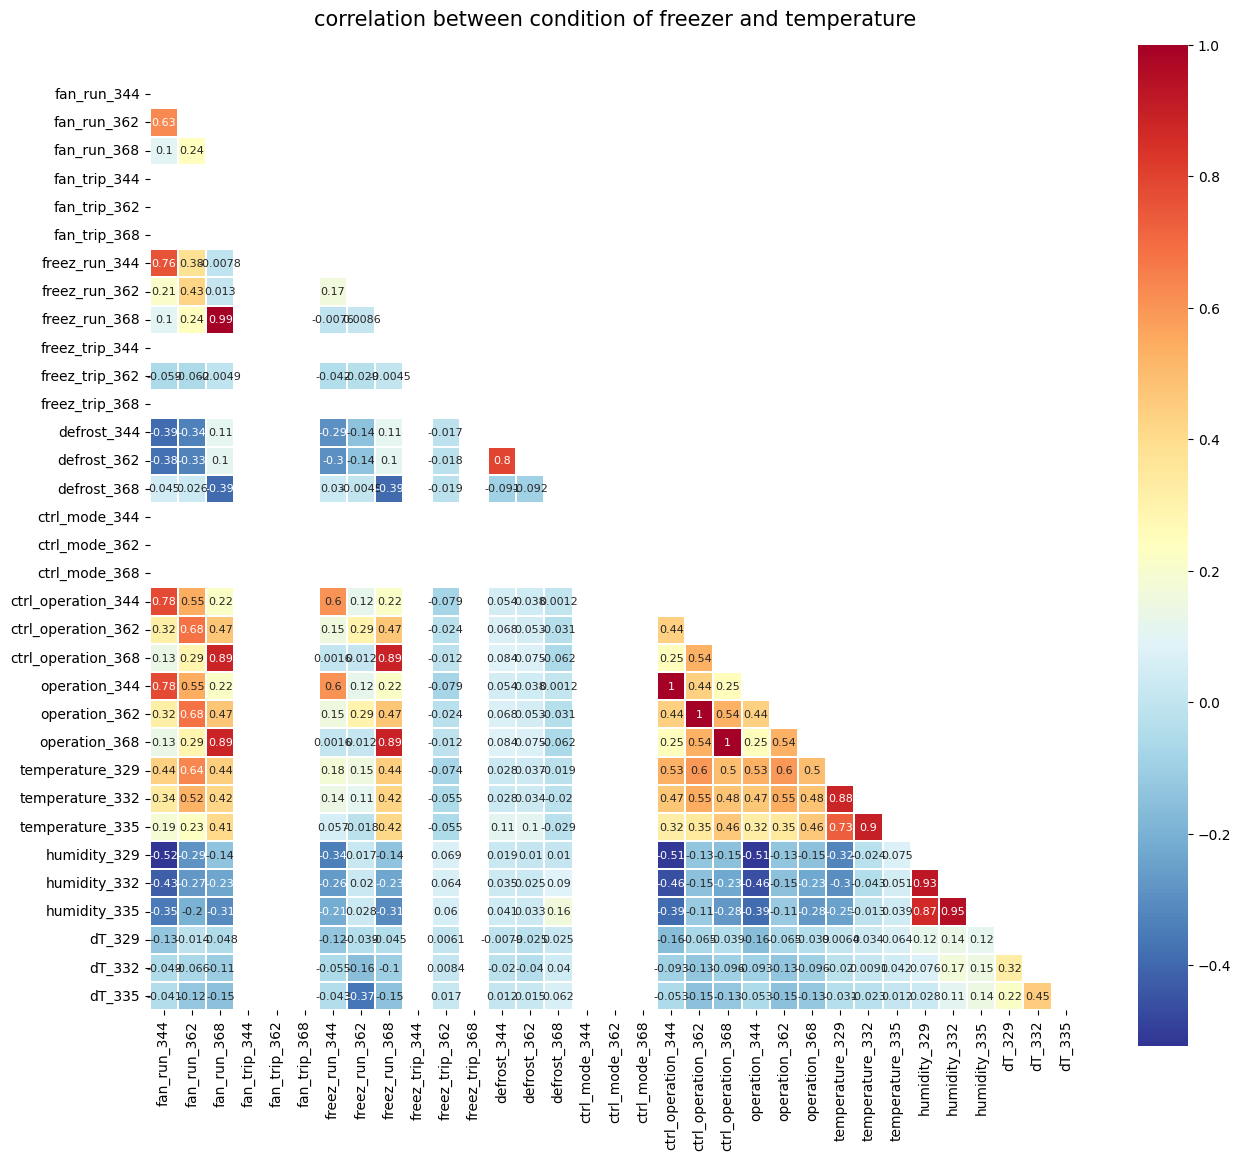

In [46]:
mask = np.zeros_like(corr1, dtype= np.bool_)
mask[np.triu_indices_from(mask)] = True

colormap = plt.cm.PuBu
plt.figure(figsize=(15, 13))
plt.title("correlation between condition of freezer and temperature", y = 1.05, size = 15)
sns.heatmap(corr1, linewidths = 0.1,mask= mask, vmax = 1.0,square = True, cmap = 'RdYlBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 8})


In [47]:
corr1.dropna().columns

Index(['fan_run_344', 'fan_run_362', 'fan_run_368', 'fan_trip_344',
       'fan_trip_362', 'fan_trip_368', 'freez_run_344', 'freez_run_362',
       'freez_run_368', 'freez_trip_344', 'freez_trip_362', 'freez_trip_368',
       'defrost_344', 'defrost_362', 'defrost_368', 'ctrl_mode_344',
       'ctrl_mode_362', 'ctrl_mode_368', 'ctrl_operation_344',
       'ctrl_operation_362', 'ctrl_operation_368', 'operation_344',
       'operation_362', 'operation_368', 'temperature_329', 'temperature_332',
       'temperature_335', 'humidity_329', 'humidity_332', 'humidity_335',
       'dT_329', 'dT_332', 'dT_335'],
      dtype='object')

# 온도 변화량 탐색 - 외부 요인 추출

In [48]:
dT_col = ['dT_'+ str(_id) for _id in sensor_id]

In [49]:
melted_df[dT_col].describe()

dT_329        dT_332        dT_335
count  80129.000000  80129.000000  80129.000000
mean       0.000017      0.000006     -0.000004
std        0.011365      0.015818      0.016748
min       -0.090000     -0.120000     -0.120000
25%       -0.010000     -0.010000     -0.010000
50%        0.000000      0.000000      0.000000
75%        0.010000      0.010000      0.010000
max        0.120000      0.250000      0.510000

<AxesSubplot: >

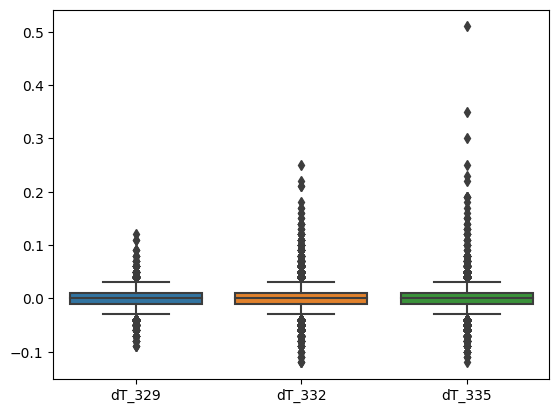

In [50]:
sns.boxplot(melted_df[dT_col])

In [51]:
# 외부 요인이 개입되어 온도가 올라가는 경우
melted_df.loc[(melted_df['dT_332']>0.1)&(melted_df['dT_335']>0.1)&(melted_df['dT_329']>0.1)]

Empty DataFrame
Columns: [gw_time, status_329, avg_temperature_329, avg_humidity_329, temperature_329, humidity_329, battery_329, available_329, status_332, avg_temperature_332, avg_humidity_332, temperature_332, humidity_332, battery_332, available_332, status_335, avg_temperature_335, avg_humidity_335, temperature_335, humidity_335, battery_335, available_335, status_344, fan_run_344, fan_trip_344, freez_run_344, freez_trip_344, defrost_344, ctrl_mode_344, ctrl_operation_344, operation_344, run_time_344, status_362, fan_run_362, fan_trip_362, freez_run_362, freez_trip_362, defrost_362, ctrl_mode_362, ctrl_operation_362, operation_362, run_time_362, status_368, fan_run_368, fan_trip_368, freez_run_368, freez_trip_368, defrost_368, ctrl_mode_368, ctrl_operation_368, operation_368, run_time_368, dT_329, dT_332, dT_335]
Index: []

[0 rows x 55 columns]

In [52]:
# 냉각
melted_df.loc[(melted_df['dT_332']<0.0)&(melted_df['dT_335']<0.0)&(melted_df['dT_329']<0.0)]

gw_time  status_329  avg_temperature_329  avg_humidity_329  \
10    2021-02-01 00:05:06           1               -20.27             60.02   
31    2021-02-01 00:15:39           1               -20.20             65.93   
39    2021-02-01 00:19:41           1               -20.27             64.78   
57    2021-02-01 00:28:44           1               -20.39             60.69   
64    2021-02-01 00:32:15           1               -20.41             59.88   
...                   ...         ...                  ...               ...   
80062 2021-02-28 23:26:20           1               -19.75             45.03   
80067 2021-02-28 23:28:51           1               -19.79             44.92   
80071 2021-02-28 23:30:52           1               -19.81             44.82   
80079 2021-02-28 23:34:54           1               -19.86             44.69   
80091 2021-02-28 23:40:56           1               -19.92             44.46   

       temperature_329  humidity_329  battery_329  available_329  status_332  \
10              -20.29         63.15          100              1           1   
31              -20.25         63.31          100              1           1   
39              -20.24         63.05          100              1           1   
57              -20.22         60.89          100              1           1   
64              -20.20         60.28          100              1           1   
...                ...           ...          ...            ...         ...   
80062           -18.90         44.08          100              1           1   
80067           -18.95         43.93          100              1           1   
80071           -18.97         43.90          100              1           1   
80079           -19.01         43.81          100              1           1   
80091           -19.06         43.66          100              1           1   

       avg_temperature_332  ...  freez_run_368  freez_trip_368  defrost_368  \
10                  -20.27  ...            1.0             0.0          0.0   
31                  -20.20  ...            1.0             0.0          0.0   
39                  -20.27  ...            1.0             0.0          0.0   
57                  -20.39  ...            1.0             0.0          0.0   
64                  -20.41  ...            1.0             0.0          0.0   
...                    ...  ...            ...             ...          ...   
80062               -19.75  ...            1.0             0.0          0.0   
80067               -19.79  ...            1.0             0.0          0.0   
80071               -19.81  ...            1.0             0.0          0.0   
80079               -19.86  ...            1.0             0.0          0.0   
80091               -19.92  ...            1.0             0.0          0.0   

       ctrl_mode_368  ctrl_operation_368  operation_368  run_time_368  dT_329  \
10               1.0                 1.0            1.0           5.0   -0.01   
31               1.0                 1.0            1.0          15.0   -0.01   
39               1.0                 1.0            1.0          19.0   -0.02   
57               1.0                 1.0            1.0          28.0   -0.01   
64               1.0                 1.0            1.0          32.0   -0.02   
...              ...                 ...            ...           ...     ...   
80062            1.0                 1.0            1.0        1406.0   -0.01   
80067            1.0                 1.0            1.0        1408.0   -0.01   
80071            1.0                 1.0            1.0        1410.0   -0.01   
80079            1.0                 1.0            1.0        1414.0   -0.01   
80091            1.0                 1.0            1.0        1421.0   -0.01   

       dT_332  dT_335  
10      -0.01   -0.01  
31      -0.03   -0.01  
39      -0.03   -0.01  
57      -0.01   -0.01  
64      -0.01   -0.01  
...       ...     ...  
80062 

In [53]:
# 외부 요인이 개입되어 온도가 급상승한 경우
melted_df.loc[(melted_df['dT_332']>0.01)&(melted_df['dT_335']>0.01)]

gw_time  status_329  avg_temperature_329  avg_humidity_329  \
12    2021-02-01 00:06:06           1               -20.26             59.90   
23    2021-02-01 00:11:38           1               -20.23             62.07   
25    2021-02-01 00:12:38           1               -20.21             62.69   
111   2021-02-01 00:55:53           1               -20.58             57.54   
130   2021-02-01 01:05:26           1               -20.65             55.93   
...                   ...         ...                  ...               ...   
79923 2021-02-28 22:16:26           1               -18.85             54.47   
79934 2021-02-28 22:21:57           1               -18.82             52.75   
79946 2021-02-28 22:27:59           1               -18.80             51.34   
80096 2021-02-28 23:43:27           1               -19.90             44.87   
80120 2021-02-28 23:55:32           1               -19.82             46.24   

       temperature_329  humidity_329  battery_329  available_329  status_332  \
12              -20.29         63.04          100              1           1   
23              -20.27         62.76          100              1           1   
25              -20.28         62.89          100              1           1   
111             -20.29         58.30          100              1           1   
130             -20.35         56.84          100              1           1   
...                ...           ...          ...            ...         ...   
79923           -18.29         54.68          100              1           1   
79934           -18.29         53.14          100              1           1   
79946           -18.26         51.45          100              1           1   
80096           -19.08         43.55          100              1           1   
80120           -18.94         45.02          100              1           1   

       avg_temperature_332  ...  freez_run_368  freez_trip_368  defrost_368  \
12                  -20.26  ...            1.0             0.0          0.0   
23                  -20.23  ...            1.0             0.0          0.0   
25                  -20.21  ...            1.0             0.0          0.0   
111                 -20.58  ...            1.0             0.0          0.0   
130                 -20.65  ...            1.0             0.0          0.0   
...                    ...  ...            ...             ...          ...   
79923               -18.85  ...            1.0             0.0          0.0   
79934               -18.82  ...            1.0             0.0          0.0   
79946               -18.80  ...            1.0             0.0          0.0   
80096               -19.90  ...            1.0             0.0          0.0   
80120               -19.82  ...            1.0             0.0          0.0   

       ctrl_mode_368  ctrl_operation_368  operation_368  run_time_368  dT_329  \
12               1.0                 1.0            1.0           6.0    0.00   
23               1.0                 1.0            1.0          11.0    0.01   
25               1.0                 1.0            1.0          12.0    0.00   
111              1.0                 1.0            1.0          55.0   -0.02   
130              1.0                 1.0            1.0          65.0    0.00   
...              ...                 ...            ...           ...     ...   
79923            1.0                 1.0            1.0        1336.0    0.00   
79934            1.0                 1.0            1.0        1341.0   -0.01   
79946            1.0                 1.0            1.0        1347.0    0.00   
80096            1.0                 1.0            1.0        1423.0    0.00   
80120            1.0                 1.0            1.0        1435.0    0.00   

       dT_332  dT_335  
12       0.01    0.01  
23       0.01    0.01  
25       0.02    0.01  
111      0.02    0.01  
130      0.01    0.01  
...       ...     ...  
79923 

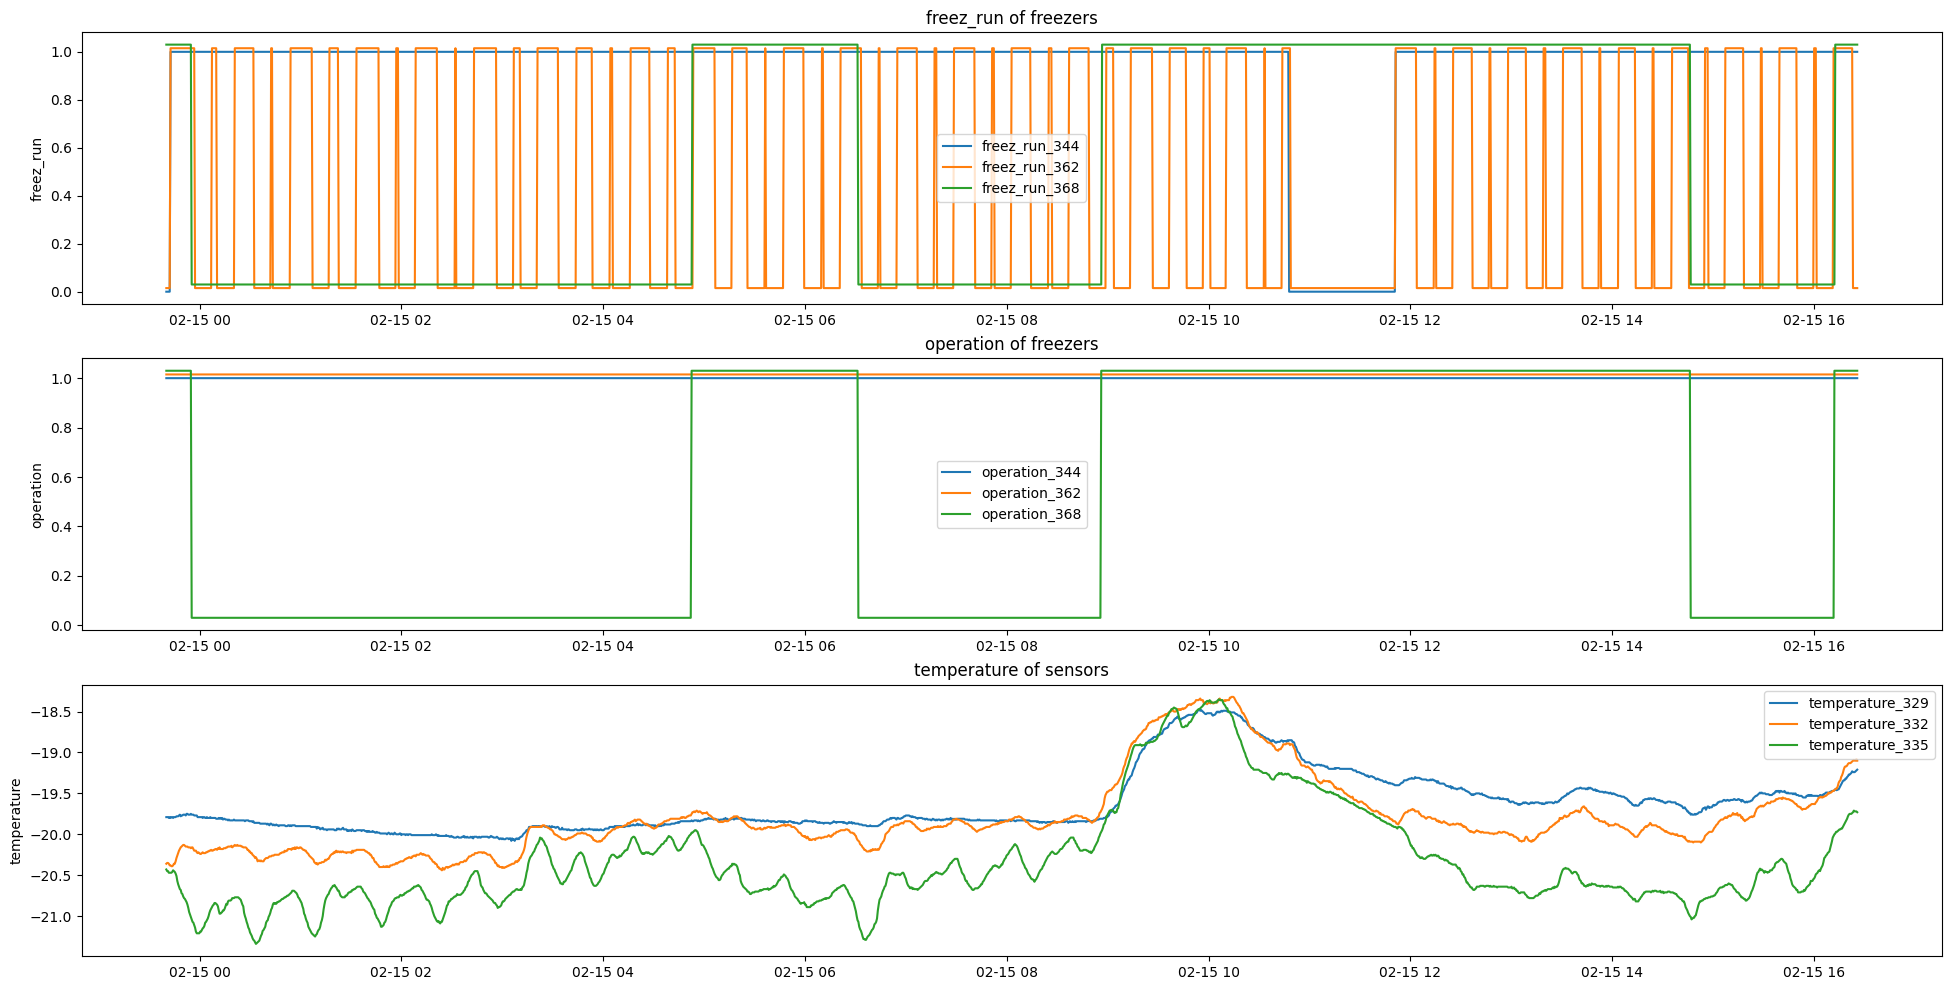

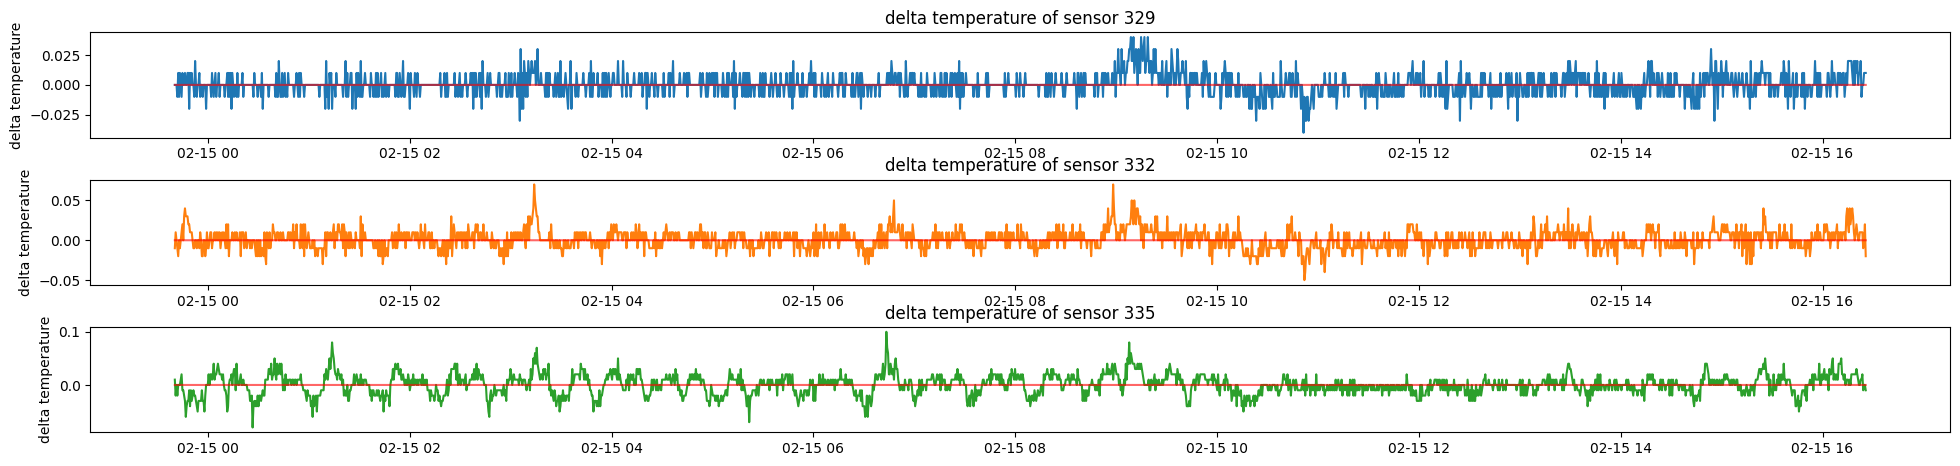

In [60]:
test_figure = melted_df[40000:42000]
plt.figure(figsize = (24,12))

plt.subplot(3,1,1)
plt.title("freez_run of freezers")
w = 0
for _id in freezer_id:
    plt.plot(test_figure['gw_time'],test_figure['freez_run'+'_'+str(_id)]+w, label = 'freez_run'+'_'+str(_id),alpha = 1)
    w+= 0.015
plt.ylabel('freez_run')
plt.legend()



plt.subplot(3,1,2)
plt.title("operation of freezers")
w = 0
for _id in freezer_id:
    plt.plot(test_figure['gw_time'],test_figure['operation'+'_'+str(_id)]+w, label = 'operation'+'_'+str(_id),alpha = 1)
    w+= 0.015
plt.ylabel('operation')
plt.legend()

plt.subplot(3,1,3)
plt.title('temperature of sensors')
for _id in sensor_id:
    plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
plt.ylabel('temperature')
plt.legend()

plt.show()

i = 1
colors = ['tab:blue','tab:orange','tab:green']
plt.figure(figsize = (24,5))
for _id in sensor_id:
    plt.subplot(3,1,i)
    plt.title('delta temperature of sensor '+str(_id), loc= 'center')
    plt.plot(test_figure['gw_time'],test_figure['dT'+'_'+str(_id)], label = 'dT'+'_'+str(_id),alpha = 1, color = colors[i-1])
    plt.plot(test_figure['gw_time'], [0]*len(test_figure), color = 'r', alpha = 0.6)
    plt.ylabel('delta temperature')
    i+=1
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

# 간단한 모델 만들기

In [102]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [103]:
model_cols = corr1.dropna().columns
df = melted_df.copy()[model_cols]
df.index = melted_df['gw_time']
df = df.dropna()

In [104]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols =['dT_'+str(_id) for _id in sensor_id]+['temperature_'+str(_id) for _id in sensor_id]


In [105]:
TEST_SIZE = 8000
train = df[:-TEST_SIZE]
test = df[-TEST_SIZE:]

for col in scale_cols:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
    test[col] = scaler.transform(test[col].values.reshape(-1,1))

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_9644\402147883.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_9644\402147883.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = scaler.transform(test[col].values.reshape(-1,1))
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_9644\402147883.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [147]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [148]:
model_cols

Index(['fan_run_344', 'fan_run_362', 'fan_run_368', 'fan_trip_344',
       'fan_trip_362', 'fan_trip_368', 'freez_run_344', 'freez_run_362',
       'freez_run_368', 'freez_trip_344', 'freez_trip_362', 'freez_trip_368',
       'defrost_344', 'defrost_362', 'defrost_368', 'ctrl_mode_344',
       'ctrl_mode_362', 'ctrl_mode_368', 'ctrl_operation_344',
       'ctrl_operation_362', 'ctrl_operation_368', 'operation_344',
       'operation_362', 'operation_368', 'temperature_329', 'temperature_332',
       'temperature_335', 'humidity_329', 'humidity_332', 'humidity_335',
       'dT_329', 'dT_332', 'dT_335'],
      dtype='object')

In [149]:
label_cols1 = ['temperature_'+str(_id) for _id in sensor_id] + ['humidity_'+str(_id) for _id in sensor_id]
# 일단 하나만
label_cols = ['temperature_329']
feature_cols = [col for col in model_cols if col not in label_cols1]

In [150]:
feature_cols = ['fan_run_344',
 'fan_run_362',
 'fan_run_368',
 'fan_trip_344',
 'fan_trip_362',
 'fan_trip_368',
 'freez_run_344',
 'freez_run_362',
 'freez_run_368',
 'freez_trip_344',
 'freez_trip_362',
 'freez_trip_368',
 'defrost_344',
 'defrost_362',
 'defrost_368',
 'ctrl_mode_344',
 'ctrl_mode_362',
 'ctrl_mode_368',
 'ctrl_operation_344',
 'ctrl_operation_362',
 'ctrl_operation_368',
 'operation_344',
 'operation_362',
 'operation_368']

In [151]:
train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2, shuffle = False)

x_train.shape, x_valid.shape
# ((57676, 20, 21), (14419, 20, 21))



((57676, 20, 24), (14419, 20, 24))

In [152]:
test_feature = test[feature_cols]
test_label = test[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((7980, 20, 24), (7980, 1))

In [153]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(64, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='tanh', 
               return_sequences=False)
          )
model.add(Dense(1))

In [141]:
os.environ["CUDA_VISIBLE_DEVICES"]= "0"

In [154]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('C:/project/_files/Aerix_freezer/model', 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=256,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint],
                    shuffle = False)

Epoch 1/100
223/226 [============================>.] - ETA: 0s - loss: 0.0108
Epoch 1: val_loss improved from inf to 0.02942, saving model to C:/project/_files/Aerix_freezer/model\tmp_checkpoint.h5
226/226 [==============================] - 4s 12ms/step - loss: 0.0108 - val_loss: 0.0294
Epoch 2/100
225/226 [============================>.] - ETA: 0s - loss: 0.0069
Epoch 2: val_loss did not improve from 0.02942
226/226 [==============================] - 2s 9ms/step - loss: 0.0069 - val_loss: 0.0430
Epoch 3/100
224/226 [============================>.] - ETA: 0s - loss: 0.0062
Epoch 3: val_loss did not improve from 0.02942
226/226 [==============================] - 2s 9ms/step - loss: 0.0061 - val_loss: 0.0458
Epoch 4/100
221/226 [============================>.] - ETA: 0s - loss: 0.0058
Epoch 4: val_loss did not improve from 0.02942
226/226 [==============================] - 2s 9ms/step - loss: 0.0058 - val_loss: 0.0467
Epoch 5/100
221/226 [============================>.] - ETA: 0s - loss:

In [144]:
# model.save('C:/project/_files/Aerix_freezer/model')
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

250/250 [==============================] - 2s 4ms/step


In [157]:
pred

array([[[0.30138484],
        [0.4010277 ],
        [0.42909545],
        ...,
        [0.4008856 ],
        [0.4005435 ],
        [0.40026274]],

       [[0.30138484],
        [0.4010277 ],
        [0.44093597],
        ...,
        [0.40096322],
        [0.40060624],
        [0.4003286 ]],

       [[0.30138484],
        [0.4099532 ],
        [0.4358875 ],
        ...,
        [0.40102327],
        [0.40063998],
        [0.40559766]],

       ...,

       [[0.3072412 ],
        [0.40559405],
        [0.43372458],
        ...,
        [0.4001546 ],
        [0.39980477],
        [0.39956605]],

       [[0.3072412 ],
        [0.40559405],
        [0.43372458],
        ...,
        [0.40016267],
        [0.39986506],
        [0.39965132]],

       [[0.3072412 ],
        [0.40559405],
        [0.43372458],
        ...,
        [0.40023628],
        [0.39996028],
        [0.39975223]]], dtype=float32)

ValueError: x and y can be no greater than 2D, but have shapes (7980,) and (7980, 20, 1)

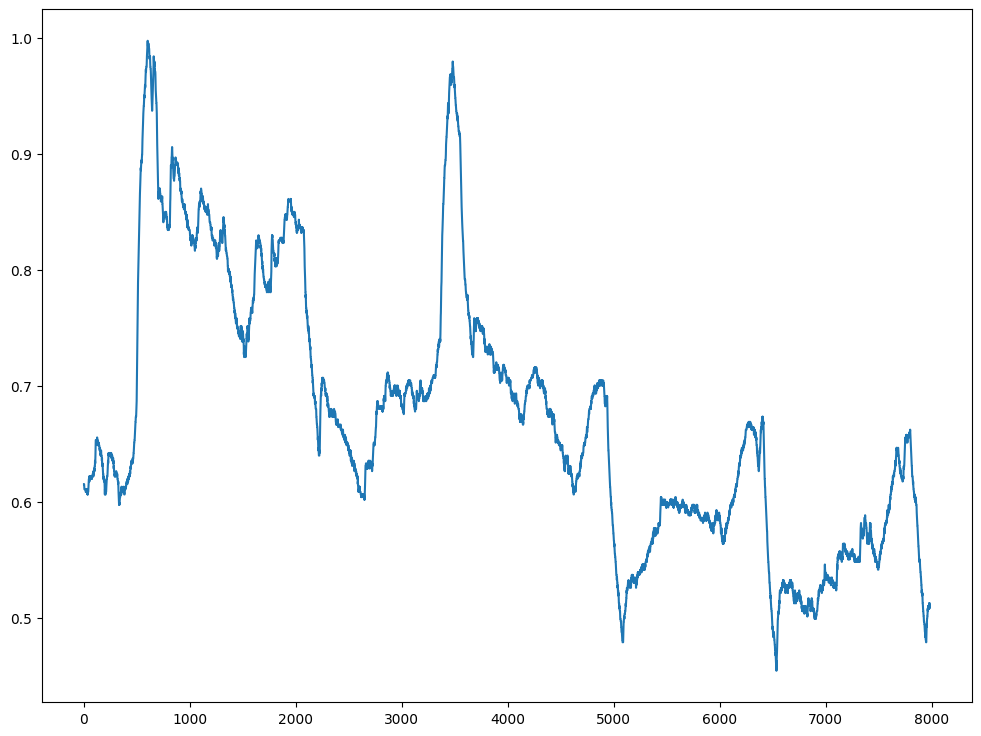

In [156]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()